# Рынок недвижимости в Турции

__Задача__: Анализ рынка недвижимости Турции

__Цель__:
Провести комплексный анализ данных о турецкой недвижимости, выполнить предобработку данных для дальнейшего построения моделей машинного обучения.

__Основные задачи__:

- _Загрузка и первичный анализ данных_:    

    Изучить структуру данных, типы признаков, наличие пропусков и дубликатов     
    Провести описательный анализ числовых и категориальных признаков       
                    _ _
- _Предобработка данных_:

    Удалить бесполезные признаки    
    Обработать дубликаты    
    Выполнить перевод турецких значений на русский язык     
    Преобразовать данные в правильный формат    
    Обработать аномалии и заполнить пропуски         
    _ _
- _Анализ данных_:

    Исследовать распределения ключевых признаков     
    Выявить взаимосвязи между признаками    
    Проанализировать особенности рынка недвижимости Турции    
    Создать чистый dataset для дальнейшего моделирования    
    Подготовить признаки для задач регрессии и классификаци     

## Предобработка данных

Подключаем необходимые модули для предобработки данных

In [1]:
# Работа с данными
import pandas as pd
import numpy as np

# Визуализация данных
import matplotlib.pyplot as plt
import seaborn as sns

# Кодирование категориальных данных
from sklearn.preprocessing import LabelEncoder
import pickle

# Отключение предупреждений
import warnings
warnings.filterwarnings('ignore')

Для начала конечно же необходимо загрузить датасет, который представлен в формате .csv файла

In [2]:
df = pd.read_csv('real_estate_data.csv')

Взглянем на первые 10 записей

In [3]:
df.head(10)

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY
5,6,Konut,Rezidans,11/9/18,12/9/18,1,30,2,10-20 arası,10,1+1,45.0,İstanbul/Maltepe/Altayçeşme,NaN,Fancoil,780000.0,TRY
6,7,Konut,Daire,1/4/19,NaN,2,54,0,20 ve üzeri,14,3+1,160.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3750.0,TRY
7,8,Konut,Villa,10/3/18,1/3/19,1,92,0,4,NaN,4+1,NaN,İzmir/Urla/M. Fevzi Çakmak,NaN,Fancoil,1500000.0,TRY
8,9,Konut,Daire,2/16/19,NaN,1,11,NaN,2,Kot 2,3+1,140.0,Çanakkale/Ayvacık/Küçükkuyu Bld. (Mıhlı),NaN,Fancoil,1500000.0,TRY
9,10,Konut,Daire,12/26/18,12/26/18,1,0,1,1,Asma Kat,2+2,550.0,İstanbul/Fatih/Sarıdemir,NaN,Fancoil,84256.0,GBP


Описание данных  

- __type__ - Тип недвижимости	(Konut = Жильё)
- __sub_type__ - Подгруппа типа недвижимости
    •	Rezidans — Резиденция / Апартаменты премиум-класса     
    •	Daire — Квартира     
    •	Villa — Вилла     
    •	Müstakil Ev — Отдельный дом     
    •	Kooperatif — Кооператив (имеется в виду кооперативная квартира)     
    •	Yazlık — Дача (дом для летнего отдыха)     
    •	Komple Bina — Целое здание     
    •	Prefabrik Ev — Сборный дом / Модульный дом     
    •	Köşk / Konak / Yalı — Кёшк / Ко́нак / Ялы (особняк / усадьба / прибрежный особняк)     
    •	Çiftlik Evi — Фермерский дом     
    •	Yalı Dairesi — Апартаменты в прибрежном особняке     
    •	Loft — Лофт     
- __start_date__ - Дата, когда объявление становится активным на рынке	
- __end_date__ - Дата, когда объявление перестаёт быть активным на рынке
- __listing_type__ - Тип объявления (Пока однозначно не понятно, что тут за значения)
- __tom__ - Время на рынке	
- __building_age__ - Возраст здания	(«arası» - «между», «ve üzeri» - «и выше»)
- __total_floor_count__	- Общее количество этажей в здании	(«arası» - «между», «ve üzeri» - «и выше»)
- __room_count__ - Количество комнат в квартире
- __size__ - Площадь дома	м²
- __address__ - Адрес жилья	город/округ/район
- __furnished__   
    •	Eşyalı = С мебелью    
    •	Eşyasız = Без мебели    
    •	Sadece Beyaz Eşya = Только белая техника    
    •	Sadece Mutfak = только кухня    
- __currency__ - Валюта, в которой указана цена дома  	
- __floor_no__ - Информация о номере этажа в данном объявлении     
    •	Yüksek giriş = 1-й этаж    
    •	Giriş kat, Kot1, Zemin kat = цокольный этаж    
    •	Çatı Katı = пентхаус     
    •	Bahçe katı = квартира на первом этаже с садом      
    •	Asma Kat — Мезонин (антресольный этаж)      
    •	Müstakil — Отдельный (отдельный вход/этаж)       
    •	En Üst Kat — Самый верхний этаж    
    •	Giriş Katı — Первый этаж    
    •	Teras Kat — Этаж с террасой    
    •	Komple — Полностью (вся единица/здание)    
    •	Bodrum Kat — Подвальный этаж    
- __price__ - Стоимость дома	
- __heating_type__ - Различные типы систем отопления    
    •	Kalorifer (Doğalgaz) = центральное отопление/природный газ      
    •	Kalorifer (Kömür) = центральное отопление/уголь     
    •	Kombi (Elektrikli) = комбинированный котел       
    •	Klima = кондиционер        
    •	Kombi (Doğalgaz) = газовый комбинированный котел     
    •	Merkezi Sistem = центральное отопление      
    •	Merkezi Sistem (Isı Payı Ölçer) = центральное отопление      
    •	Yerden Isıtma = подогрев пола       
    •	Soba (Kömür) = отопительная печь/уголь      
    •	Soba (Doğalgaz) = отопительная печь/природный газ      
    •	Güneş Enerjisi = солнечная энергия      
    •	Jeotermal = геотермальная энергия        
    •	Fancoil = тип кондиционера        
    •	Kat Kaloriferi = Центральное отопление       
    •	Kalorifer (Akaryakıt) = центральное отопление/мазут       
    •	Yok = отсутствует
- __price_currency__ - Валюта в которой указана стоимость

Целевая переменная для задачи регрессии - price  
Целевая переменная для задачи классифкации - sub_type

Раз есть столбец id будем его использовать как id

In [4]:
df.set_index('id', inplace=True, drop=True)
df

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
id,,,,,,,,,,,,,,,,
1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403483,Konut,Daire,9/18/18,NaN,2,162,NaN,NaN,NaN,+,NaN,İstanbul/Sultanbeyli/Adil,NaN,NaN,1500.0,TRY
403484,Konut,Daire,10/11/18,NaN,1,139,NaN,NaN,NaN,2+1,NaN,Sakarya/Adapazarı/Cumhuriyet,NaN,NaN,120000.0,TRY
403485,Konut,Daire,11/22/18,NaN,1,97,NaN,NaN,NaN,1+1,NaN,Antalya/Alanya/Saray,NaN,NaN,48000.0,EUR


Взглянем на размеры датасета

In [5]:
print(df.shape)

# Сохранение изначальных размеров
records_before, features_before = df.shape[0], df.shape[1]

(403487, 16)


Всего 403487 записей и 16 признаков. Сохраним эти значения, чтобы позже посмотреть сколько данных будет потерянно в ходе предобработки

Теперь взглянем на общую информацию о датасете

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403487 entries, 1 to 403487
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   type               403487 non-null  object 
 1   sub_type           403487 non-null  object 
 2   start_date         403487 non-null  object 
 3   end_date           266298 non-null  object 
 4   listing_type       403487 non-null  int64  
 5   tom                403487 non-null  int64  
 6   building_age       376097 non-null  object 
 7   total_floor_count  375466 non-null  object 
 8   floor_no           368191 non-null  object 
 9   room_count         403487 non-null  object 
 10  size               257481 non-null  float64
 11  address            403487 non-null  object 
 12  furnished          0 non-null       float64
 13  heating_type       375517 non-null  object 
 14  price              402772 non-null  float64
 15  price_currency     402772 non-null  object 
dtypes: floa

Как уже говорилось в датасете 16 признаков, из них категориальных 7 (type, sub_type, listing_type, addres, furnished, heating_type, price_currency) и 9 числовых (start_date, end_date, tom, building_age, total_floor_count, floor_no, room_count, size, price).   
  
Не все признаки имеют тот тип данных, который логически предполагаем, с этим предстоит разобраться

Посмотрим на описательную статистику

In [7]:
# Ставим другой формат, чтобы числа отображались
pd.options.display.float_format = '{:.2f}'.format

# Выделяем категориальные признаки
cat_features = ['type', 'sub_type', 'listing_type', 'address', 'furnished', 'heating_type', 'price_currency']

# Выводим отдельно для численных и категориальных признаков
display(df.describe())
display(df[cat_features].describe(include='all'))

,listing_type,tom,size,furnished,price
count,403487.00,403487.00,257481.00,0.00,402772.00
mean,1.29,57.02,279.35,NaN,354641.66
std,0.47,44.36,9429.20,NaN,4809502.70
min,1.00,0.00,1.00,NaN,-250.00
25%,1.00,29.00,85.00,NaN,2500.00
50%,1.00,40.00,110.00,NaN,199000.00
75%,2.00,90.00,140.00,NaN,342000.00
max,3.00,180.00,948235.00,NaN,2000000000.00


,type,sub_type,listing_type,address,furnished,heating_type,price_currency
count,403487,403487,403487.00,403487,0.00,375517,402772
unique,1,12,NaN,7842,NaN,16,4
top,Konut,Daire,NaN,Balıkesir/Edremit/Akçay,NaN,Kombi (Doğalgaz),TRY
freq,403487,354549,NaN,5611,NaN,204150,400677
mean,NaN,NaN,1.29,NaN,NaN,NaN,NaN
std,NaN,NaN,0.47,NaN,NaN,NaN,NaN
min,NaN,NaN,1.00,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.00,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.00,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.00,NaN,NaN,NaN,NaN


Что можно сказать судя по описательной статистике: есть выбросы в столбцах size (слишком маленькие квартиры) и price (отрицательная и большая цена).   По категориальным признакам пока мало что понятно из-за турецкого, позже после предобработки данных посмотрим на описательную статистику ещё раз

Также необходимо посмотреть на наличие дубликатов и пропущенных значений

In [8]:
def dataset_quality_report_detailed(df):
    duplicates = df.duplicated().sum()

    print("=" * 60)
    print(f"Размер датасета: {df.shape[0]} строк × {df.shape[1]} столбцов")
    print(f"Количество дубликатов строк: {duplicates}")
    print("\nПропущенные значения по столбцам:")
    print("-" * 40)

    for col in df.columns:
        missing_in_col = df[col].isnull().sum()
        percent_in_col = (missing_in_col / df.shape[0]) * 100
        print(f"{col:<30} : {missing_in_col:>5} ({percent_in_col:>5.2f}%)")

    print("=" * 60)

In [9]:
dataset_quality_report_detailed(df)

Размер датасета: 403487 строк × 16 столбцов
Количество дубликатов строк: 11455

Пропущенные значения по столбцам:
----------------------------------------
type                           :     0 ( 0.00%)
sub_type                       :     0 ( 0.00%)
start_date                     :     0 ( 0.00%)
end_date                       : 137189 (34.00%)
listing_type                   :     0 ( 0.00%)
tom                            :     0 ( 0.00%)
building_age                   : 27390 ( 6.79%)
total_floor_count              : 28021 ( 6.94%)
floor_no                       : 35296 ( 8.75%)
room_count                     :     0 ( 0.00%)
size                           : 146006 (36.19%)
address                        :     0 ( 0.00%)
furnished                      : 403487 (100.00%)
heating_type                   : 27970 ( 6.93%)
price                          :   715 ( 0.18%)
price_currency                 :   715 ( 0.18%)


И того дубликатов в датасете аж 11455 записей. Пропеущенные значения имеют столбцы: end_date, building_age, total_floor_count, floor_no, size, furnished, heating_type, price, price_currency.   
  
Видно, что доля пропущенных значений в признаке furnished = 100%, а значит здесь он не является полезным и его следует удалить. Другие же пропуски будут заполняться по ходу работы, т.к. есть взаимосвязанные столбцы. Также удалим все дубликаты

In [10]:
df.drop_duplicates(inplace=True)
df.drop('furnished', axis=1, inplace=True)

Начнём с приведения всех признаков в их предполагаемый тип данных. Для этого надо проанализировать значения, содержащиеся в таких столбцах

In [11]:
categories = ['type', 'sub_type', 'listing_type', 'floor_no', 'heating_type', 'total_floor_count', 'price_currency']

for category in categories:
    print(f'Уникальные значения для {category}')
    print(f'{df[category].unique()}\n')

Уникальные значения для type
['Konut']

Уникальные значения для sub_type
['Rezidans' 'Daire' 'Villa' 'Müstakil Ev' 'Kooperatif' 'Yazlık'
 'Komple Bina' 'Prefabrik Ev' 'Köşk / Konak / Yalı' 'Çiftlik Evi'
 'Yalı Dairesi' 'Loft']

Уникальные значения для listing_type
[2 1 3]

Уникальные значения для floor_no
['2' '20 ve üzeri' 'Yüksek Giriş' '10' '14' nan 'Kot 2' 'Asma Kat'
 'Bahçe katı' '11' '3' '13' '7' '16' 'Müstakil' 'Zemin Kat' '19' '4' '5'
 'En Üst Kat' '8' '15' '1' 'Giriş Katı' '9' 'Çatı Katı' '12' '17' '6'
 'Kot 4' 'Kot 1' 'Kot 3' '18' 'Teras Kat' 'Komple' 'Bodrum Kat' 1 2 3 12 4
 5 6 7 8]

Уникальные значения для heating_type
['Fancoil' 'Yok' 'Kalorifer (Doğalgaz)' 'Kalorifer (Kömür)'
 'Kombi (Elektrikli)' 'Klima' 'Kombi (Doğalgaz)'
 'Merkezi Sistem (Isı Payı Ölçer)' 'Merkezi Sistem' 'Soba (Kömür)'
 'Yerden Isıtma' 'Soba (Doğalgaz)' 'Güneş Enerjisi'
 'Kalorifer (Akaryakıt)' 'Jeotermal' 'Kat Kaloriferi' nan]

Уникальные значения для total_floor_count
['20 ve üzeri' '1' '10-20 aras

Итак по полученной информации можно сделать следующий вывод:  
  
- Столбец type содержит только одно уникальное значение, что не даёт никакой пользы. Его предстоит удалить;
- Столбец sub_type нужно будет просто перевести на русский, дабы правильно проанализировать его;
- Столбец listing_type имеет уже заранее закодированные значения, однако их 3, а не 2 (Аренда и Продажа) как указывалось в сводке к датасету;
- Столбец floor_no необходимо будет привести к целочисленному типу данных, интерпретируя перевод турецких обозначений как этажи;
- Столбец heating_type нужно будет просто перевести на русский, дабы правильно проанализировать его;
- Столбец total_floor_count также необходимо будет привести к целочисленному типу данных;
- Столбец price_currency пока трогать не нужно;

Первым делом удаляем признак type

In [12]:
df.drop('type', axis=1, inplace=True)

Отлично, дальше идём к переводу столбцов на русский (sub_type и heating_type)

In [13]:
# Словарь переводов для типа жилья
sub_type_translate = {
                     'Rezidans':'Резиденция',
                     'Daire':'Квартира',
                     'Villa':'Вилла',
                     'Müstakil Ev':'Отдельный дом',
                     'Kooperatif':'Кооператив',
                     'Yazlık':'Летний дом',
                     'Komple Bina':'Целое здание',
                     'Prefabrik Ev':'Сборный дом',
                     'Köşk / Konak / Yalı':'Особняк / Прибрежный дом (Ялы)', # Köşk и Konak переводятся одинаково
                     'Çiftlik Evi':'Фермерский дом',
                     'Yalı Dairesi':'Прибрежная квартира',
                     'Loft':'Лофт'
                    }

# Словарь переводов для типа отопления
heating_type_translate = {
                     'Fancoil': 'Фанкойл', # блок системы кондиционирования 
                     'Yok': 'Нет',
                     'Kalorifer (Doğalgaz)': 'Центральное отопление (Газ)',
                     'Kalorifer (Kömür)': 'Центральное отопление (Уголь)',
                     'Kombi (Elektrikli)': 'Котел (Электрический)',
                     'Klima': 'Кондиционер',
                     'Kombi (Doğalgaz)': 'Котел (Газовый)',
                     'Merkezi Sistem (Isı Payı Ölçer)': 'Центральная система (с теплосчетчиком)',
                     'Merkezi Sistem': 'Центральная система',
                     'Soba (Kömür)': 'Печь (Угольная)',
                     'Yerden Isıtma': 'Теплый пол',
                     'Soba (Doğalgaz)': 'Печь (Газовая)',
                     'Güneş Enerjisi': 'Солнечная энергия',
                     'Kalorifer (Akaryakıt)': 'Центральное отопление (Жидкое топливо)',
                     'Jeotermal': 'Геотермальное',
                     'Kat Kaloriferi': 'Поквартирное отопление'
                    }

Производим замену турецких слов на русские

In [14]:
col_translate = {
    'sub_type': sub_type_translate, 
    'heating_type': heating_type_translate, 
}

for key, value in col_translate.items():
    df[key].replace(value, inplace=True)

Проверяем результат

In [15]:
df[['sub_type', 'heating_type']].head(5)

,sub_type,heating_type
id,,
1,Резиденция,Фанкойл
2,Квартира,Фанкойл
3,Квартира,Фанкойл
4,Резиденция,Фанкойл
5,Резиденция,Фанкойл


Отлично, теперь можно перейти к признакам, связанные с этажами

Для того чтобы решить вопрос с номером этажа жилья, т.е. для всех указать определённый этаж, придётся логически поразмыслить и, опираясь на перевод с турецкого на русский, выделить несколько групп:  

- Kot 1/2/3/4, Bodrum Kat (Подвал) - по сути своей подывалы. Цифру после "Kot" можно считать отрицательным этажом;  
- Zemin Kat (Первый этаж), Giriş Katı (Входной этаж), Bahçe katı (Садовый этаж), Yüksek Giriş (Высокий вход) - всё это можно отнести к 1 этажу, кроме высокого входа - его ко второму;  
- Çatı Katı (Чердак), En Üst Kat (Верхний этаж), Teras Kat (Террасный этаж) - скорее всего последние этажи зданий. Будут равняться значению из столбца total_floor_count;  
- 20 ve üzeri (20 и выше) - тут можно просто урезать до 20 этажа;  
- Asma Kat (Мезонин) - полуэтаж, который как бы делит 1-ый и 2-ой этаж. Можно считать его как за 1.5 этаж;
- Müstakil (Отдельно стоящий), Komple (Полный) - может подразумевать всё здание, а так как оно начинается с 1-го этажа, заместо них можно поставить единичку.

In [16]:
def floor_no_processing(floor):
    # Возвращаем NaN, если значение уже NaN
    if pd.isna(floor):
        return np.nan
    
    # Если значение уже число, возвращаем его
    if isinstance(floor, (int, float)):
        return floor

    # Создаем словарь для замены
    floor_mapping = {
        'nan': np.nan,
        'Yüksek Giriş': 1.5,
        'Kot 2': -2,
        'Kot 1': -1,
        'Kot 3': -3,
        'Kot 4': -4,
        'Asma Kat': 1,
        'Bahçe katı': 1,
        'Müstakil': 1,
        'Zemin Kat': 1,
        'Giriş Katı': 1,
        'Bodrum Kat': -1,
        '20 ve üzeri': 20,
        'Komple': 1,
        'Çatı Katı': np.nan,  # Пока оставляем как NaN, обработаем позже
        'En Üst Kat': np.nan, # Пока оставляем как NaN, обработаем позже
        'Teras Kat': np.nan,  # Пока оставляем как NaN, обработаем позже
    }
    
    # Проверяем, есть ли значение в маппинге
    if floor in floor_mapping:
        return floor_mapping[floor]

    # Если это число в строковом формате, преобразуем в число
    try:
        return float(floor)
    except ValueError:
        # Если не удается преобразовать, возвращаем NaN
        return np.nan

# Заменяем значения по словарю
df['floor_no_clean'] = df['floor_no'].apply(floor_no_processing)

Предварительно проверяем результат преобразования

In [17]:
df['floor_no_clean'].unique()

array([ 2. , 20. ,  1.5, 10. , 14. ,  nan, -2. ,  1. , 11. ,  3. , 13. ,
        7. , 16. , 19. ,  4. ,  5. ,  8. , 15. ,  9. , 12. , 17. ,  6. ,
       -4. , -1. , -3. , 18. ])

Отлично, осталось только заполнить данные о мансардных и чердачных квартир, чтобы это сделать необходимо обработать признак total_floor_count.  

Обрабатываться будет следующим образом: обозначения типа '10-20 arası' будут заменяться на рандомное число от 10 до 20, либо же числом в столбце floor_no, если оно входит в диапазон и известно; обозначения типа '20 ve üzeri' будут заменяться на 25 - средний вариант.

In [18]:
# Фиксируем seed для воспроизводимости
np.random.seed(42)

# Функция для обработки общего количества этажей
def total_floors_processing(row):
    total_floors = row['total_floor_count']
    
    # Если значение уже число, возвращаем его
    if isinstance(total_floors, (int, float)) and not pd.isna(total_floors):
        return total_floors
    
    # Обрабатываем специальные случаи
    if total_floors == '10-20 arası':
        # Получаем этаж квартиры
        apartment_floor = row['floor_no_clean']
        
        # Если этаж квартиры известен и больше 10, используем его как минимальное значение
        if pd.notna(apartment_floor) and apartment_floor > 10:
            min_floor = max(10, apartment_floor)
            return np.random.randint(min_floor, 21)
        else:
            return np.random.randint(10, 21)
    
    elif total_floors == '20 ve üzeri':
        # Для высотных зданий используем консервативную оценку
        apartment_floor = row['floor_no_clean']
        if pd.notna(apartment_floor) and apartment_floor > 20:
            return apartment_floor + np.random.randint(1, 6)  # Добавляем 1-5 этажей
        else:
            return 25  # Базовое значение для высотных зданий
    
    # Для других строковых значений можно добавить дополнительную обработку
    else:
        try:
            return float(total_floors)
        except (ValueError, TypeError):
            return np.nan

# Применяем функцию обработки
df['total_floor_count'] = df.apply(total_floors_processing, axis=1)

Проверяем результат преобразования

In [19]:
df['total_floor_count'].unique()

array([25.,  1., 16.,  4.,  2.,  3., 14.,  8., 17., 20., 15.,  7.,  6.,
       19.,  5., 10., 12., 18., nan, 13., 11.,  9.])

Теперь можно заполнить информацию о floor_no для мансардных и чердачных квартир

In [20]:
# Заполняем пропуски для мансардных этажей
attic_mask = df['floor_no'].isin(['Çatı Katı', 'En Üst Kat', 'Teras Kat'])
df.loc[attic_mask, 'floor_no_clean'] = df.loc[attic_mask, 'total_floor_count']

# Проверяем на наличие аномалий
anomalies = df[df['floor_no_clean'] > df['total_floor_count']]
if not anomalies.empty:
    print(f"Найдено {len(anomalies)} аномалий после обработки")
    # Исправляем аномалии - ограничиваем этаж квартиры этажностью здания
    df.loc[anomalies.index, 'floor_no_clean'] = df.loc[anomalies.index, 'total_floor_count']

Найдено 1558 аномалий после обработки


Столбцы floor_no и total_floor_count обработаны. Можно посмотреть на описательную статистику по этим столбцам

In [21]:
df[['total_floor_count', 'floor_no_clean']].describe()

,total_floor_count,floor_no_clean
count,365292.00,358345.00
mean,5.93,2.90
std,4.60,3.05
min,1.00,-4.00
25%,3.00,1.00
50%,4.00,2.00
75%,6.00,4.00
max,25.00,25.00


Можно сказать, что в среднем встречаются 6-этажные здания и жилища на ~3 этаже

Теперь удалим столбец floor_no за ненадобностью

In [22]:
df.drop('floor_no', inplace=True, axis=1)
df

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,room_count,size,address,heating_type,price,price_currency,floor_no_clean
id,,,,,,,,,,,,,,
1,Резиденция,12/10/18,1/9/19,2,30,0,25.00,2+1,90.00,İstanbul/Kartal/Kordonboyu,Фанкойл,3500.00,TRY,2.00
2,Квартира,2/13/19,NaN,1,14,0,25.00,1+0,43.00,İstanbul/Kartal/Kordonboyu,Фанкойл,490000.00,TRY,20.00
3,Квартира,10/9/18,11/8/18,1,30,0,1.00,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,Фанкойл,155000.00,TRY,1.00
4,Резиденция,9/10/18,10/10/18,1,30,3,25.00,6+1,450.00,İstanbul/Beşiktaş/Levent,Фанкойл,32500000.00,TRY,20.00
5,Резиденция,12/10/18,1/9/19,1,30,0,25.00,2+1,90.00,İstanbul/Kartal/Kordonboyu,Фанкойл,1450000.00,TRY,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403483,Квартира,9/18/18,NaN,2,162,NaN,NaN,+,NaN,İstanbul/Sultanbeyli/Adil,NaN,1500.00,TRY,NaN
403484,Квартира,10/11/18,NaN,1,139,NaN,NaN,2+1,NaN,Sakarya/Adapazarı/Cumhuriyet,NaN,120000.00,TRY,NaN
403485,Квартира,11/22/18,NaN,1,97,NaN,NaN,1+1,NaN,Antalya/Alanya/Saray,NaN,48000.00,EUR,NaN


Что можно сделать для более глубоко анализа цен, так это разделить адресс на составные части - город, округ и район

In [23]:
# Разделяем признак на 3 столбца
df[['city', 'district', 'neighborhood']] = df['address'].str.split('/', expand=True)
df.drop('address', axis=1, inplace=True)
df

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,room_count,size,heating_type,price,price_currency,floor_no_clean,city,district,neighborhood
id,,,,,,,,,,,,,,,,
1,Резиденция,12/10/18,1/9/19,2,30,0,25.00,2+1,90.00,Фанкойл,3500.00,TRY,2.00,İstanbul,Kartal,Kordonboyu
2,Квартира,2/13/19,NaN,1,14,0,25.00,1+0,43.00,Фанкойл,490000.00,TRY,20.00,İstanbul,Kartal,Kordonboyu
3,Квартира,10/9/18,11/8/18,1,30,0,1.00,2+1,NaN,Фанкойл,155000.00,TRY,1.00,Tekirdağ,Çorlu,Reşadiye
4,Резиденция,9/10/18,10/10/18,1,30,3,25.00,6+1,450.00,Фанкойл,32500000.00,TRY,20.00,İstanbul,Beşiktaş,Levent
5,Резиденция,12/10/18,1/9/19,1,30,0,25.00,2+1,90.00,Фанкойл,1450000.00,TRY,2.00,İstanbul,Kartal,Kordonboyu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403483,Квартира,9/18/18,NaN,2,162,NaN,NaN,+,NaN,NaN,1500.00,TRY,NaN,İstanbul,Sultanbeyli,Adil
403484,Квартира,10/11/18,NaN,1,139,NaN,NaN,2+1,NaN,NaN,120000.00,TRY,NaN,Sakarya,Adapazarı,Cumhuriyet
403485,Квартира,11/22/18,NaN,1,97,NaN,NaN,1+1,NaN,NaN,48000.00,EUR,NaN,Antalya,Alanya,Saray


Отлично, дальше можно будет провернуть несколько операция для улучшения модели с таким подходом

Теперь можно поработать с датой, а именно сделать преобразования типа данных и вычислить пропущенные значения в end_date, т.к. известны все записи tom, которые являются количеством дней, которые объявление висело в интернете.

In [24]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

df[['start_date', 'end_date']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 392032 entries, 1 to 403487
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   start_date  392032 non-null  datetime64[ns]
 1   end_date    259921 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 17.0 MB


In [25]:
def calculate_end_date(row):
    end_date = row['end_date']

    if not pd.isna(end_date):
        return end_date

    tom = row['tom']
    start_date = row['start_date']
        
    calculated_end_date = start_date + pd.Timedelta(days=tom)
    return calculated_end_date

df['end_date'] = df.apply(calculate_end_date, axis=1)

print(f'Пропущенных значений осталось - {df['end_date'].isnull().sum()}')
df

Пропущенных значений осталось - 0


,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,room_count,size,heating_type,price,price_currency,floor_no_clean,city,district,neighborhood
id,,,,,,,,,,,,,,,,
1,Резиденция,2018-12-10,2019-01-09,2,30,0,25.00,2+1,90.00,Фанкойл,3500.00,TRY,2.00,İstanbul,Kartal,Kordonboyu
2,Квартира,2019-02-13,2019-02-27,1,14,0,25.00,1+0,43.00,Фанкойл,490000.00,TRY,20.00,İstanbul,Kartal,Kordonboyu
3,Квартира,2018-10-09,2018-11-08,1,30,0,1.00,2+1,NaN,Фанкойл,155000.00,TRY,1.00,Tekirdağ,Çorlu,Reşadiye
4,Резиденция,2018-09-10,2018-10-10,1,30,3,25.00,6+1,450.00,Фанкойл,32500000.00,TRY,20.00,İstanbul,Beşiktaş,Levent
5,Резиденция,2018-12-10,2019-01-09,1,30,0,25.00,2+1,90.00,Фанкойл,1450000.00,TRY,2.00,İstanbul,Kartal,Kordonboyu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403483,Квартира,2018-09-18,2019-02-27,2,162,NaN,NaN,+,NaN,NaN,1500.00,TRY,NaN,İstanbul,Sultanbeyli,Adil
403484,Квартира,2018-10-11,2019-02-27,1,139,NaN,NaN,2+1,NaN,NaN,120000.00,TRY,NaN,Sakarya,Adapazarı,Cumhuriyet
403485,Квартира,2018-11-22,2019-02-27,1,97,NaN,NaN,1+1,NaN,NaN,48000.00,EUR,NaN,Antalya,Alanya,Saray


Отлично дата полностью обработана и пропущенных значений больше не осталось

Посмотрим на столбец с возрастом зданий

In [26]:
df['building_age'].unique()

array(['0', '3', '2', nan, '1', '6-10 arası', '4', '16-20 arası',
       '26-30 arası', '40 ve üzeri', '11-15 arası', '21-25 arası', '5',
       '31-35 arası', '36-40 arası'], dtype=object)

Такие турецкие обозначения как arası и ve üzeri уже встречались, а значит обработать из можно примерно также

In [27]:
def building_age_processing(row):
    building_age = row['building_age']
    
    # Если значение уже число, возвращаем его
    if isinstance(building_age, (int)) and not pd.isna(building_age):
        return building_age

    if 'arası' in str(building_age):
        first_num = int(building_age.split('-')[0])
        second_num = int(building_age.split('-')[1].split(' ')[0]) + 1
        
        return np.random.randint(first_num, second_num)

    # Когда встречается 'или больше' возвращаем нижний порог
    if 've üzeri' in str(building_age):
        age = int(building_age.split(' ')[0])
        return age
        
    # Для других строковых значений можно добавить дополнительную обработку
    else:
        try:
            return int(building_age)
        except (ValueError, TypeError):
            return np.nan

df['building_age'] = df.apply(building_age_processing, axis=1)
df

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,room_count,size,heating_type,price,price_currency,floor_no_clean,city,district,neighborhood
id,,,,,,,,,,,,,,,,
1,Резиденция,2018-12-10,2019-01-09,2,30,0.00,25.00,2+1,90.00,Фанкойл,3500.00,TRY,2.00,İstanbul,Kartal,Kordonboyu
2,Квартира,2019-02-13,2019-02-27,1,14,0.00,25.00,1+0,43.00,Фанкойл,490000.00,TRY,20.00,İstanbul,Kartal,Kordonboyu
3,Квартира,2018-10-09,2018-11-08,1,30,0.00,1.00,2+1,NaN,Фанкойл,155000.00,TRY,1.00,Tekirdağ,Çorlu,Reşadiye
4,Резиденция,2018-09-10,2018-10-10,1,30,3.00,25.00,6+1,450.00,Фанкойл,32500000.00,TRY,20.00,İstanbul,Beşiktaş,Levent
5,Резиденция,2018-12-10,2019-01-09,1,30,0.00,25.00,2+1,90.00,Фанкойл,1450000.00,TRY,2.00,İstanbul,Kartal,Kordonboyu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403483,Квартира,2018-09-18,2019-02-27,2,162,NaN,NaN,+,NaN,NaN,1500.00,TRY,NaN,İstanbul,Sultanbeyli,Adil
403484,Квартира,2018-10-11,2019-02-27,1,139,NaN,NaN,2+1,NaN,NaN,120000.00,TRY,NaN,Sakarya,Adapazarı,Cumhuriyet
403485,Квартира,2018-11-22,2019-02-27,1,97,NaN,NaN,1+1,NaN,NaN,48000.00,EUR,NaN,Antalya,Alanya,Saray


Отлично, теперь можно сраху же обработать пропущенные значения, посмотрим сколько их осталось после предыдущиз обработок

In [28]:
building_age_nulls = df['building_age'].isnull().sum()
building_age_percent = (building_age_nulls / df.shape[0]) * 100

print(f'Количество пропусков - {building_age_nulls}')
print(f'Процент пропусков - {building_age_percent:>5.2f}%')

Количество пропусков - 26242
Процент пропусков -  6.69%


Заполнение каким-то одним значением все 26 000 записей может добавить шума в данных. Можно использовать следующий подход: заполнить пропуски, групируя здания по городу и округу, вычисляя средний возраст зданий по ним и заполняя пропуски им же.

In [29]:
df['building_age'] = df.groupby(['city', 'district'])['building_age'].transform(lambda x: x.fillna(x.median()))
df['building_age'].isnull().sum()

np.int64(70)

Пропусков стало гораздно меньше, теперь оставшиеся значения можно заполнить обычным средним значением

In [30]:
df['building_age'].fillna(df['building_age'].mean(), inplace=True)
df['building_age'].isnull().sum()

np.int64(0)

Хорошо, столбец полностью обработан и пропусков не осталось

Пришло время приступить к одному из самых неприятных признаков - size. Почему именно неприятный? Потому что при анализе описательной статистики были замечены аномалии, а количество пропусков здесь очень велико, что делает этот признак одним из сложнейших для обработки.  

Для начала посмотрим, какие вообще значения встречаются в датасете

In [31]:
df[pd.notna(df['size'])]['size'].sort_values()

id
304779        1.00
279103        1.00
64326         1.00
109           1.00
235387        1.00
            ...   
367825   902221.00
367572   902221.00
103043   909039.00
369220   930259.00
126479   948235.00
Name: size, Length: 250268, dtype: float64

Здесь тоже видны жилища с размером = 1 кв. м. Вычитав в интернете, что минимальный размер квартиры в Турции — это квартира-студия или апартаменты 1+0 с площадью от 28 кв. м., можно сказать, что такие маленькие жилища являются скорее всего аномалиями, но всё же стоит взглянуть на них

In [32]:
df[df['size'] < 28]

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,room_count,size,heating_type,price,price_currency,floor_no_clean,city,district,neighborhood
id,,,,,,,,,,,,,,,,
49,Кооператив,2018-11-10,2018-12-10,1,30,0.00,10.00,1+0,1.00,Фанкойл,300000.00,TRY,1.00,İzmir,Aliağa,Yenişakran
109,Кооператив,2018-11-10,2019-01-09,1,60,0.00,10.00,1+0,1.00,Фанкойл,300000.00,TRY,1.00,İzmir,Aliağa,Yenişakran
224,Резиденция,2019-02-04,2019-02-27,1,23,14.00,25.00,9+2,1.00,Фанкойл,132500000.00,TRY,20.00,İstanbul,Beşiktaş,Vişnezade
305,Квартира,2019-01-18,2019-02-27,2,40,1.00,7.00,1+0,23.00,Фанкойл,1100.00,TRY,3.00,İzmir,Bornova,Kazımdirik
358,Квартира,2019-01-29,2019-02-27,2,29,1.00,7.00,1+0,23.00,Фанкойл,1100.00,TRY,3.00,İzmir,Bornova,Kazımdirik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402383,Сборный дом,2019-01-01,2019-02-27,1,57,1.00,NaN,1+0,14.00,NaN,8250.00,TRY,NaN,Antalya,Kepez,Habibler
402547,Сборный дом,2019-01-24,2019-02-27,1,34,7.00,NaN,2+1,23.00,NaN,9999.00,TRY,NaN,Antalya,Muratpaşa,Yenigün
402992,Квартира,2019-01-15,2019-02-27,2,43,9.00,NaN,1+0,25.00,NaN,35000.00,TRY,NaN,Balıkesir,Ayvalık,İsmetpaşa


Всего 721 запись. Статистически это можно посчитать аномалией и удалить, т.к. доля этих данных мала. Так и сделаем

In [33]:
df.drop(df[df['size'] < 28].index, inplace=True)
df[df['size'] < 28]

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,room_count,size,heating_type,price,price_currency,floor_no_clean,city,district,neighborhood
id,,,,,,,,,,,,,,,,


Отлично, теперь необходимо перейти к большим жилищам. Проанализируем всё, что больше 10 000 кв. м.

In [34]:
df[df['size'] > 10000]

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,room_count,size,heating_type,price,price_currency,floor_no_clean,city,district,neighborhood
id,,,,,,,,,,,,,,,,
33,Резиденция,2018-11-05,2019-02-27,1,114,16.00,7.00,6+3,618173.00,Фанкойл,847000.00,TRY,1.00,İstanbul,Avcılar,Yeşilkent
90,Квартира,2019-01-07,2019-01-07,1,0,1.00,25.00,6+3,22699.00,Фанкойл,162222.00,EUR,9.00,Ankara,Elmadağ,Hasanoğlan Havuzbaşı
149,Квартира,2018-12-24,2018-12-24,1,0,23.00,5.00,9+4,367331.00,Фанкойл,808222.00,TRY,-4.00,İstanbul,Güngören,Gençosman
306,Квартира,2018-12-24,2018-12-24,1,0,1.00,3.00,8+3,363679.00,Фанкойл,74222.00,TRY,-2.00,İstanbul,Güngören,Mehmet Nesih Özmen
390,Квартира,2018-12-18,2018-12-18,1,0,19.00,4.00,8+3,608860.00,Фанкойл,865222.00,USD,4.00,İstanbul,Beylikdüzü,Yakuplu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399459,Квартира,2019-01-31,2019-02-27,1,27,0.00,NaN,1+0,14000.00,NaN,17000.00,TRY,NaN,Ankara,Akyurt,Atatürk
399469,Квартира,2019-02-12,2019-02-12,1,0,1.00,NaN,1+1,68202.00,NaN,82922.00,USD,NaN,Sakarya,Akyazı,Ballıkaya
399703,Фермерский дом,2018-11-14,2019-02-27,1,105,7.00,NaN,3+1,27140.00,NaN,2000000.00,TRY,NaN,Sakarya,Adapazarı,Aşırlar


Конечно ещё можно понять, что какая нибудь Резеденция или Фермерский дом будут иметь столь громадные размеры вместе с площадью участка, но вот Квартиры в этом случае являются скорее выбросом. В принципе сложно найти квартиры, которые больше 1000 кв. м. Пусть это будет как условной гранцийо между номрой и аномалией

In [35]:
df[(df['size'] > 1000) & ((df['sub_type'] == 'Квартира') | (df['sub_type'] == 'Прибрежная квартира'))]

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,room_count,size,heating_type,price,price_currency,floor_no_clean,city,district,neighborhood
id,,,,,,,,,,,,,,,,
90,Квартира,2019-01-07,2019-01-07,1,0,1.00,25.00,6+3,22699.00,Фанкойл,162222.00,EUR,9.00,Ankara,Elmadağ,Hasanoğlan Havuzbaşı
149,Квартира,2018-12-24,2018-12-24,1,0,23.00,5.00,9+4,367331.00,Фанкойл,808222.00,TRY,-4.00,İstanbul,Güngören,Gençosman
306,Квартира,2018-12-24,2018-12-24,1,0,1.00,3.00,8+3,363679.00,Фанкойл,74222.00,TRY,-2.00,İstanbul,Güngören,Mehmet Nesih Özmen
390,Квартира,2018-12-18,2018-12-18,1,0,19.00,4.00,8+3,608860.00,Фанкойл,865222.00,USD,4.00,İstanbul,Beylikdüzü,Yakuplu
421,Квартира,2018-12-18,2018-12-18,1,0,3.00,5.00,10+0,81191.00,Фанкойл,937222.00,GBP,1.00,İstanbul,Sarıyer,Zekeriyaköy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401011,Квартира,2019-01-30,2019-01-30,1,0,6.72,NaN,2+1,30164.00,NaN,383213.00,EUR,NaN,Konya,Bozkır,Aydınkışla
401029,Квартира,2018-11-25,2019-01-30,1,66,2.00,NaN,1+0,8239.00,NaN,75000.00,TRY,NaN,Düzce,Merkez,Karadere Hasanağa Köyü
401306,Квартира,2018-12-07,2018-12-07,1,0,6.00,NaN,2+1,1002.00,NaN,300000.00,TRY,NaN,Ankara,Elmadağ,Hasanoğlan Havuzbaşı


Снова же всего 138 записей, можно засчитать такие квартиры как аномалии и просто удалить

In [36]:
indexes = df[(df['size'] > 1000) & ((df['sub_type'] == 'Квартира') | (df['sub_type'] == 'Прибрежная квартира'))].index
df.drop(indexes, inplace=True)

df[(df['size'] > 1000) & ((df['sub_type'] == 'Квартира') | (df['sub_type'] == 'Прибрежная квартира'))]

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,room_count,size,heating_type,price,price_currency,floor_no_clean,city,district,neighborhood
id,,,,,,,,,,,,,,,,


Превосходно, можно считать, что с аномалиями покончено. Осталось лишь как-то заполнить чуть ли не 40 % пропусков. В ходе экспериментов был выбран следующий подход: пропущенные значения будут заполняться примерно по тому же алгоритму, что и возраст здания, т.е. будем группировать жилища по городу, округу и дополнительно по количеству комнат, затем вычислять медиану для группы и заполнять в ней пропуски. 

Но чтобы заполнить пропуски, необходимо для начала обработать столбец room_count

Посмотрим на него. В Турции указание количество комнат отличается от России: сначала указывается количество спален, а затем гостиных через +.

In [37]:
df['room_count'].unique()

array(['2+1', '1+0', '6+1', '1+1', '3+1', '4+1', '2+2', '9+2', '5+2',
       '6+3', '6+2', '4+3', '9+5', '5+1', '3+2', '+', '4+2', '7+2', '8+2',
       '8+3', '8+1', '7+1', '10+1', '10+0', '9+3', '8+4', '7+3', '10+2',
       '9+4', '5+3', '9+1', '0+0', '10+5', '10+3', '10+4', '11+3', '15+5'],
      dtype=object)

Есть 2 значения, которые не должны быть в столбце: + и 0+0. Посмотрим какова доля таких значений

In [38]:
anomalies_rooms_count = df[(df['room_count'] == '+') | (df['room_count'] == '0+0')].shape[0]
anomalies_rooms_percent = (anomalies_rooms_count / df.shape[0]) * 100

print(f'Количество аномалий - {anomalies_rooms_count}')
print(f'Процент аномалий - {anomalies_rooms_percent:>5.2f}%')

Количество аномалий - 2564
Процент аномалий -  0.66%


Снова же, процент небольшой и можно было бы их удалить, но почему бы не воспользоваться такой же тактикой группировки? Но для начала преобразуем всё в целые числа

In [39]:
def room_count_process(x):
    if pd.isna(x):
        return x

    else:
        room_count = int(x.split('+')[0]) + int(x.split('+')[-1])
        return room_count

df['room_count'] = df['room_count'].replace('+', np.nan).replace('0+0', np.nan)
df['room_count'] = pd.to_numeric(df['room_count'].apply(lambda x: room_count_process(x)))

In [40]:
df['room_count'] = df.groupby(['city', 'district'])['room_count'].transform(lambda x: x.fillna(x.median()))

anomalies_rooms_count = df[(df['room_count'] == '+') | (df['room_count'] == '0+0')].shape[0]
anomalies_rooms_percent = (anomalies_rooms_count / df.shape[0]) * 100
na_rooms_count = df['building_age'].isnull().sum()

print(f'Количество аномалий - {anomalies_rooms_count}')
print(f'Процент аномалий - {anomalies_rooms_percent:>5.2f}%')
print(f'Количество пропусков - {na_rooms_count}')
df

Количество аномалий - 0
Процент аномалий -  0.00%
Количество пропусков - 0


,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,room_count,size,heating_type,price,price_currency,floor_no_clean,city,district,neighborhood
id,,,,,,,,,,,,,,,,
1,Резиденция,2018-12-10,2019-01-09,2,30,0.00,25.00,3.00,90.00,Фанкойл,3500.00,TRY,2.00,İstanbul,Kartal,Kordonboyu
2,Квартира,2019-02-13,2019-02-27,1,14,0.00,25.00,1.00,43.00,Фанкойл,490000.00,TRY,20.00,İstanbul,Kartal,Kordonboyu
3,Квартира,2018-10-09,2018-11-08,1,30,0.00,1.00,3.00,NaN,Фанкойл,155000.00,TRY,1.00,Tekirdağ,Çorlu,Reşadiye
4,Резиденция,2018-09-10,2018-10-10,1,30,3.00,25.00,7.00,450.00,Фанкойл,32500000.00,TRY,20.00,İstanbul,Beşiktaş,Levent
5,Резиденция,2018-12-10,2019-01-09,1,30,0.00,25.00,3.00,90.00,Фанкойл,1450000.00,TRY,2.00,İstanbul,Kartal,Kordonboyu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,Квартира,2019-01-12,2019-02-27,1,46,2.00,NaN,4.00,NaN,NaN,NaN,NaN,NaN,İzmir,Menemen,Zeytinlik
403483,Квартира,2018-09-18,2019-02-27,2,162,0.00,NaN,3.00,NaN,NaN,1500.00,TRY,NaN,İstanbul,Sultanbeyli,Adil
403484,Квартира,2018-10-11,2019-02-27,1,139,7.00,NaN,3.00,NaN,NaN,120000.00,TRY,NaN,Sakarya,Adapazarı,Cumhuriyet


Отично, теперь можно заполнить пропуски для признака size, т.к. пропусков и аномалий в столбце room_count больше не осталось

In [41]:
df['size_filled'] = df.groupby(['city', 'district', 'room_count'])['size'].transform(lambda x: x.fillna(x.median()))
df['size_was_missing'] = df['size'].isna().astype(int)
df['size'] = df['size_filled']
df.drop('size_filled', inplace=True, axis=1)

In [42]:
na_size_count = df['size'].isnull().sum()

print(f'Количество пропусков - {na_size_count}')

Количество пропусков - 590


Оставшиеся значения можно также заполнить медианым значением

In [43]:
df['size'].fillna(df['size'].median(), inplace=True)
na_size_count = df['size'].isnull().sum()

print(f'Количество пропусков - {na_size_count}')

Количество пропусков - 0


Овсежим память и посмотрим, какие столбцы ещё осталось обработать

In [44]:
df

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,room_count,size,heating_type,price,price_currency,floor_no_clean,city,district,neighborhood,size_was_missing
id,,,,,,,,,,,,,,,,,
1,Резиденция,2018-12-10,2019-01-09,2,30,0.00,25.00,3.00,90.00,Фанкойл,3500.00,TRY,2.00,İstanbul,Kartal,Kordonboyu,0
2,Квартира,2019-02-13,2019-02-27,1,14,0.00,25.00,1.00,43.00,Фанкойл,490000.00,TRY,20.00,İstanbul,Kartal,Kordonboyu,0
3,Квартира,2018-10-09,2018-11-08,1,30,0.00,1.00,3.00,95.00,Фанкойл,155000.00,TRY,1.00,Tekirdağ,Çorlu,Reşadiye,1
4,Резиденция,2018-09-10,2018-10-10,1,30,3.00,25.00,7.00,450.00,Фанкойл,32500000.00,TRY,20.00,İstanbul,Beşiktaş,Levent,0
5,Резиденция,2018-12-10,2019-01-09,1,30,0.00,25.00,3.00,90.00,Фанкойл,1450000.00,TRY,2.00,İstanbul,Kartal,Kordonboyu,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,Квартира,2019-01-12,2019-02-27,1,46,2.00,NaN,4.00,120.00,NaN,NaN,NaN,NaN,İzmir,Menemen,Zeytinlik,1
403483,Квартира,2018-09-18,2019-02-27,2,162,0.00,NaN,3.00,80.00,NaN,1500.00,TRY,NaN,İstanbul,Sultanbeyli,Adil,1
403484,Квартира,2018-10-11,2019-02-27,1,139,7.00,NaN,3.00,98.00,NaN,120000.00,TRY,NaN,Sakarya,Adapazarı,Cumhuriyet,1


Чтобы было удобней работать с ценами, нужно перевести всё в одну валюту. Выбор пал на доллары, т.к. с ними удобно работать в плане поиска информации в интернете.  

Но для начала нужно обработать пропуски.

In [45]:
for col in ['price', 'price_currency']:  
    na_count = df[col].isna().sum()
    na_percent = (na_rooms_count / df.shape[0]) * 100

    print(f'\n{col}')
    print(f'Количество пропусков - {na_count}')
    print(f'Процент пропусков - {na_percent:>5.2f}%')


price
Количество пропусков - 473
Процент пропусков -  0.00%

price_currency
Количество пропусков - 473
Процент пропусков -  0.00%


Доля мала, поэтому можно удалить эти пропуски

In [46]:
df.drop(df[pd.isna(df['price'])].index, inplace=True)

for col in ['price', 'price_currency']:  
    na_count = df[col].isnull().sum()
    na_percent = (na_rooms_count / df.shape[0]) * 100

    print(f'\n{col}')
    print(f'Количество пропусков - {na_count}')
    print(f'Процент пропусков - {na_percent:>5.2f}%')


price
Количество пропусков - 0
Процент пропусков -  0.00%

price_currency
Количество пропусков - 0
Процент пропусков -  0.00%


Все пропуски удалены, можно переводить цены в доллары. Для перевода использоваться будет курс валют примерно этой недели

In [47]:
def calculate_price_in_dollars(row):
    price = row['price']
    price_currency = row['price_currency']

    if price_currency == 'USD':
        return price

    multiples = {
        'TRY': 0.024292,
        'GBP': 1.34,
        'EUR': 1.15
    }

    if not pd.isna(price):
        return price * multiples[price_currency]

df['price_in_usd'] = df.apply(calculate_price_in_dollars, axis=1)
df

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,room_count,size,heating_type,price,price_currency,floor_no_clean,city,district,neighborhood,size_was_missing,price_in_usd
id,,,,,,,,,,,,,,,,,,
1,Резиденция,2018-12-10,2019-01-09,2,30,0.00,25.00,3.00,90.00,Фанкойл,3500.00,TRY,2.00,İstanbul,Kartal,Kordonboyu,0,85.02
2,Квартира,2019-02-13,2019-02-27,1,14,0.00,25.00,1.00,43.00,Фанкойл,490000.00,TRY,20.00,İstanbul,Kartal,Kordonboyu,0,11903.08
3,Квартира,2018-10-09,2018-11-08,1,30,0.00,1.00,3.00,95.00,Фанкойл,155000.00,TRY,1.00,Tekirdağ,Çorlu,Reşadiye,1,3765.26
4,Резиденция,2018-09-10,2018-10-10,1,30,3.00,25.00,7.00,450.00,Фанкойл,32500000.00,TRY,20.00,İstanbul,Beşiktaş,Levent,0,789490.00
5,Резиденция,2018-12-10,2019-01-09,1,30,0.00,25.00,3.00,90.00,Фанкойл,1450000.00,TRY,2.00,İstanbul,Kartal,Kordonboyu,0,35223.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403481,Квартира,2018-09-25,2019-01-23,1,120,2.00,NaN,4.00,135.00,NaN,185000.00,TRY,NaN,Aydın,Didim,Efeler,1,4494.02
403483,Квартира,2018-09-18,2019-02-27,2,162,0.00,NaN,3.00,80.00,NaN,1500.00,TRY,NaN,İstanbul,Sultanbeyli,Adil,1,36.44
403484,Квартира,2018-10-11,2019-02-27,1,139,7.00,NaN,3.00,98.00,NaN,120000.00,TRY,NaN,Sakarya,Adapazarı,Cumhuriyet,1,2915.04


Хорошо, теперь все цены в долларах, можно удалить 2 ненужных столбца price и price_currency

In [48]:
df.drop(['price', 'price_currency'], axis=1, inplace=True)

Теперь посмотрим на анмольные значения, ведь при анализе описательной статистики таковые были выявлены

In [49]:
df[df['price_in_usd'] <= 1]

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,room_count,size,heating_type,floor_no_clean,city,district,neighborhood,size_was_missing,price_in_usd
id,,,,,,,,,,,,,,,,
942,Резиденция,2018-11-24,2019-02-27,2,95,6.00,25.00,2.00,55.00,Нет,9.00,İstanbul,Ataşehir,Küçükbakkalköy,0,0.00
1174,Целое здание,2018-10-11,2019-02-27,1,139,30.00,2.00,4.00,115.00,Нет,NaN,İzmir,Konak,Duatepe,1,0.00
1357,Резиденция,2018-11-27,2019-02-27,2,92,2.00,4.00,2.00,50.00,Нет,1.00,İzmir,Buca,Yıldız,1,0.00
18653,Квартира,2018-09-24,2019-02-27,3,156,6.00,5.00,2.00,60.00,Центральное отопление (Уголь),3.00,Bursa,Nilüfer,Görükle,1,0.95
22743,Квартира,2018-12-12,2019-01-11,3,30,3.00,12.00,1.00,38.00,Кондиционер,1.00,İstanbul,Avcılar,Cihangir,0,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397992,Квартира,2018-12-10,2018-12-14,1,4,3.00,NaN,3.00,80.00,NaN,NaN,İstanbul,Kağıthane,Sultan Selim,1,0.12
398614,Квартира,2018-12-11,2019-02-27,3,78,2.00,NaN,3.00,85.00,NaN,NaN,İzmir,Buca,Kuruçeşme,1,0.97
400777,Квартира,2018-12-10,2018-12-10,1,0,3.00,NaN,3.00,80.00,NaN,NaN,İstanbul,Kağıthane,Sultan Selim,1,0.12


Учитывая, что объявления разделяются на 2 типа: Аренда и Продажа - даже такие маленькие цены скорее всего не возможны. Удалим все записи, где цена меньше 1 доллара

In [50]:
df.drop(df[df['price_in_usd'] <= 1].index, inplace=True)
df[df['price_in_usd'] <= 1]

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,room_count,size,heating_type,floor_no_clean,city,district,neighborhood,size_was_missing,price_in_usd
id,,,,,,,,,,,,,,,,


Хорошо, но чтобы дальше проводить какие-то манипуляции с ценой нужно учитывать, что она зависит от listing_type и для начала нужно разобраться, почему объявления делятся не на 2 типа, а на 3

In [51]:
for listing_type in df['listing_type'].unique():
    print(f'listing_type {listing_type}')
    print(f'Кол-во записей - {df[df['listing_type'] == listing_type].shape[0]}')
    display(df[df['listing_type'] == listing_type][['price_in_usd', 'price_in_usd']].describe().apply(lambda s: s.apply('{0:.5f}'.format)))

listing_type 2
Кол-во записей - 110789


,price_in_usd,price_in_usd
count,110789.00000,110789.00000
mean,424.11473,424.11473
std,82291.44727,82291.44727
min,1.21460,1.21460
25%,20.64820,20.64820
50%,29.15040,29.15040
75%,42.51100,42.51100
max,24291978.13720,24291978.13720


listing_type 1
Кол-во записей - 277756


,price_in_usd,price_in_usd
count,277756.00000,277756.00000
mean,15138.61286,15138.61286
std,180717.48016,180717.48016
min,1.33606,1.33606
25%,4494.02000,4494.02000
50%,6558.84000,6558.84000
75%,10275.51600,10275.51600
max,48584000.00000,48584000.00000


listing_type 3
Кол-во записей - 1932


,price_in_usd,price_in_usd
count,1932.00000,1932.00000
mean,3.37331,3.37331
std,15.64645,15.64645
min,1.09314,1.09314
25%,1.45752,1.45752
50%,1.82190,1.82190
75%,2.18628,2.18628
max,569.00000,569.00000


Можно сделать следующий вывод: 2 и 3 тип это объявления связанные с арендой, но насколько точно - не ясно, 1 же тип это объявления с продажой. Во всех типах есть ценовые аномалии в виде маленькой или большой цины для соответствующего типа.  

Что следует сделать: объеденим тип 3 и тип 2 в один, как оно и должно быть, а также обработаем ценовые аномалии и напишем функцию, которая будет переносить объявление в другой тип, при неких услвоиях

In [52]:
df['listing_type'] = df['listing_type'].replace(3, 2)

In [53]:
# Создадим функцию для интеллектуальной переклассификации
def recategorize_listing(row):
    # Если это аренда (тип 2) с слишком высокой ценой
    if row['listing_type'] == 2 and row['price_in_usd'] > 50000:
        # Проверяем другие признаки, характерные для продажи
        if row.get('room_count', 0) >= 3 or row.get('size', 0) > 100:
            return 1  # Переносим в продажу
        else:
            return 2  # Оставляем как аренда (возможно, коммерческая недвижимость)
    
    # Если это продажа (тип 1) с слишком низкой ценой
    elif row['listing_type'] == 1 and row['price_in_usd'] < 100000:
        # Проверяем другие признаки, характерные для аренды
        if row.get('room_count', 0) <= 2 or row.get('size', 0) < 80:
            return 2  # Переносим в аренду
        else:
            return 1  # Оставляем как продажа (возможно, доля или гараж)
    
    # Во всех остальных случаях оставляем как есть
    return row['listing_type']

# Применяем функцию
df['listing_type'] = df.apply(recategorize_listing, axis=1)

In [54]:
for listing_type in df['listing_type'].unique():
    print(f'listing_type {listing_type}')
    print(f'Кол-во записей - {df[df['listing_type'] == listing_type].shape[0]}')
    display(df[df['listing_type'] == listing_type][['price_in_usd', 'price_in_usd']].describe().apply(lambda s: s.apply('{0:.5f}'.format)))

listing_type 2
Кол-во записей - 146988


,price_in_usd,price_in_usd
count,146988.00000,146988.00000
mean,1450.61742,1450.61742
std,4271.24236,4271.24236
min,1.09314,1.09314
25%,23.07740,23.07740
50%,35.22340,35.22340
75%,412.96400,412.96400
max,99597.20000,99597.20000


listing_type 1
Кол-во записей - 243489


,price_in_usd,price_in_usd
count,243489.00000,243489.00000
mean,16586.42060,16586.42060
std,200774.39966,200774.39966
min,1.33606,1.33606
25%,4834.10800,4834.10800
50%,6923.22000,6923.22000
75%,10931.40000,10931.40000
max,48584000.00000,48584000.00000


Отлично, теперь объявления более менее распределены по нужным типам. Однако интересно взглянуть на очень дорогое жельё

In [55]:
df[df['price_in_usd'] > 100000]

,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,room_count,size,heating_type,floor_no_clean,city,district,neighborhood,size_was_missing,price_in_usd
id,,,,,,,,,,,,,,,,
4,Резиденция,2018-09-10,2018-10-10,1,30,3.00,25.00,7.00,450.00,Фанкойл,20.00,İstanbul,Beşiktaş,Levent,0,789490.00
10,Квартира,2018-12-26,2018-12-26,1,0,1.00,1.00,4.00,550.00,Фанкойл,1.00,İstanbul,Fatih,Sarıdemir,0,112903.04
20,Резиденция,2018-09-10,2019-02-11,1,154,3.00,25.00,7.00,450.00,Фанкойл,20.00,İstanbul,Beşiktaş,Levent,0,789490.00
54,Резиденция,2018-12-11,2019-02-27,1,78,0.00,25.00,4.00,190.00,Фанкойл,20.00,İstanbul,Sarıyer,Maslak,0,250000.00
60,Резиденция,2018-10-11,2018-12-14,1,64,0.00,25.00,4.00,130.00,Фанкойл,20.00,İstanbul,Şişli,Mecidiyeköy,1,255066.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403309,Отдельный дом,2018-09-12,2018-10-07,1,25,2.00,NaN,9.00,400.00,NaN,NaN,Aydın,Kuşadası,Soğucak,1,133606.00
403334,Вилла,2018-10-11,2019-02-27,1,139,0.00,NaN,4.00,150.00,NaN,NaN,KKTC,Girne,Ozanköy Köyü,1,261233.00
403366,Квартира,2018-12-18,2018-12-18,1,0,9.00,NaN,3.00,90.00,NaN,NaN,İstanbul,Sarıyer,Zekeriyaköy,0,758739.32


Всего 1 процент данных, но этот сегмент довольно важен, без него модель будет хуже предсказывать дорогие жилища. В то же время из-за неравномреного распределения, модель может получиться очень плохой, т.к. статистически эти жилища являются выбросами

Хорошо, по видимому осталось только заполнить некоторые пропущенные значения, ещё раз посмотрим, где они

In [56]:
dataset_quality_report_detailed(df)

Размер датасета: 390477 строк × 16 столбцов
Количество дубликатов строк: 134

Пропущенные значения по столбцам:
----------------------------------------
sub_type                       :     0 ( 0.00%)
start_date                     :     0 ( 0.00%)
end_date                       :     0 ( 0.00%)
listing_type                   :     0 ( 0.00%)
tom                            :     0 ( 0.00%)
building_age                   :     0 ( 0.00%)
total_floor_count              : 26301 ( 6.74%)
room_count                     :    14 ( 0.00%)
size                           :     0 ( 0.00%)
heating_type                   : 26322 ( 6.74%)
floor_no_clean                 : 33142 ( 8.49%)
city                           :     0 ( 0.00%)
district                       :     6 ( 0.00%)
neighborhood                   :    15 ( 0.00%)
size_was_missing               :     0 ( 0.00%)
price_in_usd                   :     0 ( 0.00%)


Пропуски в total_floor_count и floor_no_clean можно заполнить при помощи медианы и группировки, а для heating_type взять моду

In [57]:
df['heating_type'].mode()

0    Котел (Газовый)
Name: heating_type, dtype: object

In [58]:
df['total_floor_count'] = df.groupby(['city', 'district'])['total_floor_count'].transform(lambda x: x.fillna(x.median()))

df['heating_type'].fillna('Котел (Газовый)', inplace=True)

df['floor_no_clean'] = df.groupby(['city', 'district'])['floor_no_clean'].transform(lambda x: x.fillna(x.median()))

In [59]:
dataset_quality_report_detailed(df)

Размер датасета: 390477 строк × 16 столбцов
Количество дубликатов строк: 169

Пропущенные значения по столбцам:
----------------------------------------
sub_type                       :     0 ( 0.00%)
start_date                     :     0 ( 0.00%)
end_date                       :     0 ( 0.00%)
listing_type                   :     0 ( 0.00%)
tom                            :     0 ( 0.00%)
building_age                   :     0 ( 0.00%)
total_floor_count              :    44 ( 0.01%)
room_count                     :    14 ( 0.00%)
size                           :     0 ( 0.00%)
heating_type                   :     0 ( 0.00%)
floor_no_clean                 :    85 ( 0.02%)
city                           :     0 ( 0.00%)
district                       :     6 ( 0.00%)
neighborhood                   :    15 ( 0.00%)
size_was_missing               :     0 ( 0.00%)
price_in_usd                   :     0 ( 0.00%)


Хорошо, но при заполнении floor_no_clean мог произойти такой казус, что некоторые жилища теперь находятся на несуществующем этаже

In [60]:
df[df['floor_no_clean'] > df['total_floor_count']].shape

(1797, 16)

Это так, надо исправить

In [61]:
def equal_floor_no(row):
    if row['floor_no_clean'] > row['total_floor_count']:
        return row['total_floor_count']
    else:
        return row['floor_no_clean']

df['floor_no_clean'] = df.apply(equal_floor_no, axis=1)

In [62]:
df[df['floor_no_clean'] > df['total_floor_count']].shape

(0, 16)

Отлично, таких записей не осталось.  
А все остальные пропуски можно удалить, т.к. их доля мала

In [63]:
df.dropna(inplace=True)

dataset_quality_report_detailed(df)

Размер датасета: 390380 строк × 16 столбцов
Количество дубликатов строк: 170

Пропущенные значения по столбцам:
----------------------------------------
sub_type                       :     0 ( 0.00%)
start_date                     :     0 ( 0.00%)
end_date                       :     0 ( 0.00%)
listing_type                   :     0 ( 0.00%)
tom                            :     0 ( 0.00%)
building_age                   :     0 ( 0.00%)
total_floor_count              :     0 ( 0.00%)
room_count                     :     0 ( 0.00%)
size                           :     0 ( 0.00%)
heating_type                   :     0 ( 0.00%)
floor_no_clean                 :     0 ( 0.00%)
city                           :     0 ( 0.00%)
district                       :     0 ( 0.00%)
neighborhood                   :     0 ( 0.00%)
size_was_missing               :     0 ( 0.00%)
price_in_usd                   :     0 ( 0.00%)


Теперь данные готовы к корреляцонному анализу и анализу распределения

## Корреляционный анализ и анализ распределения

Для начала посмотрим на распределение признаков

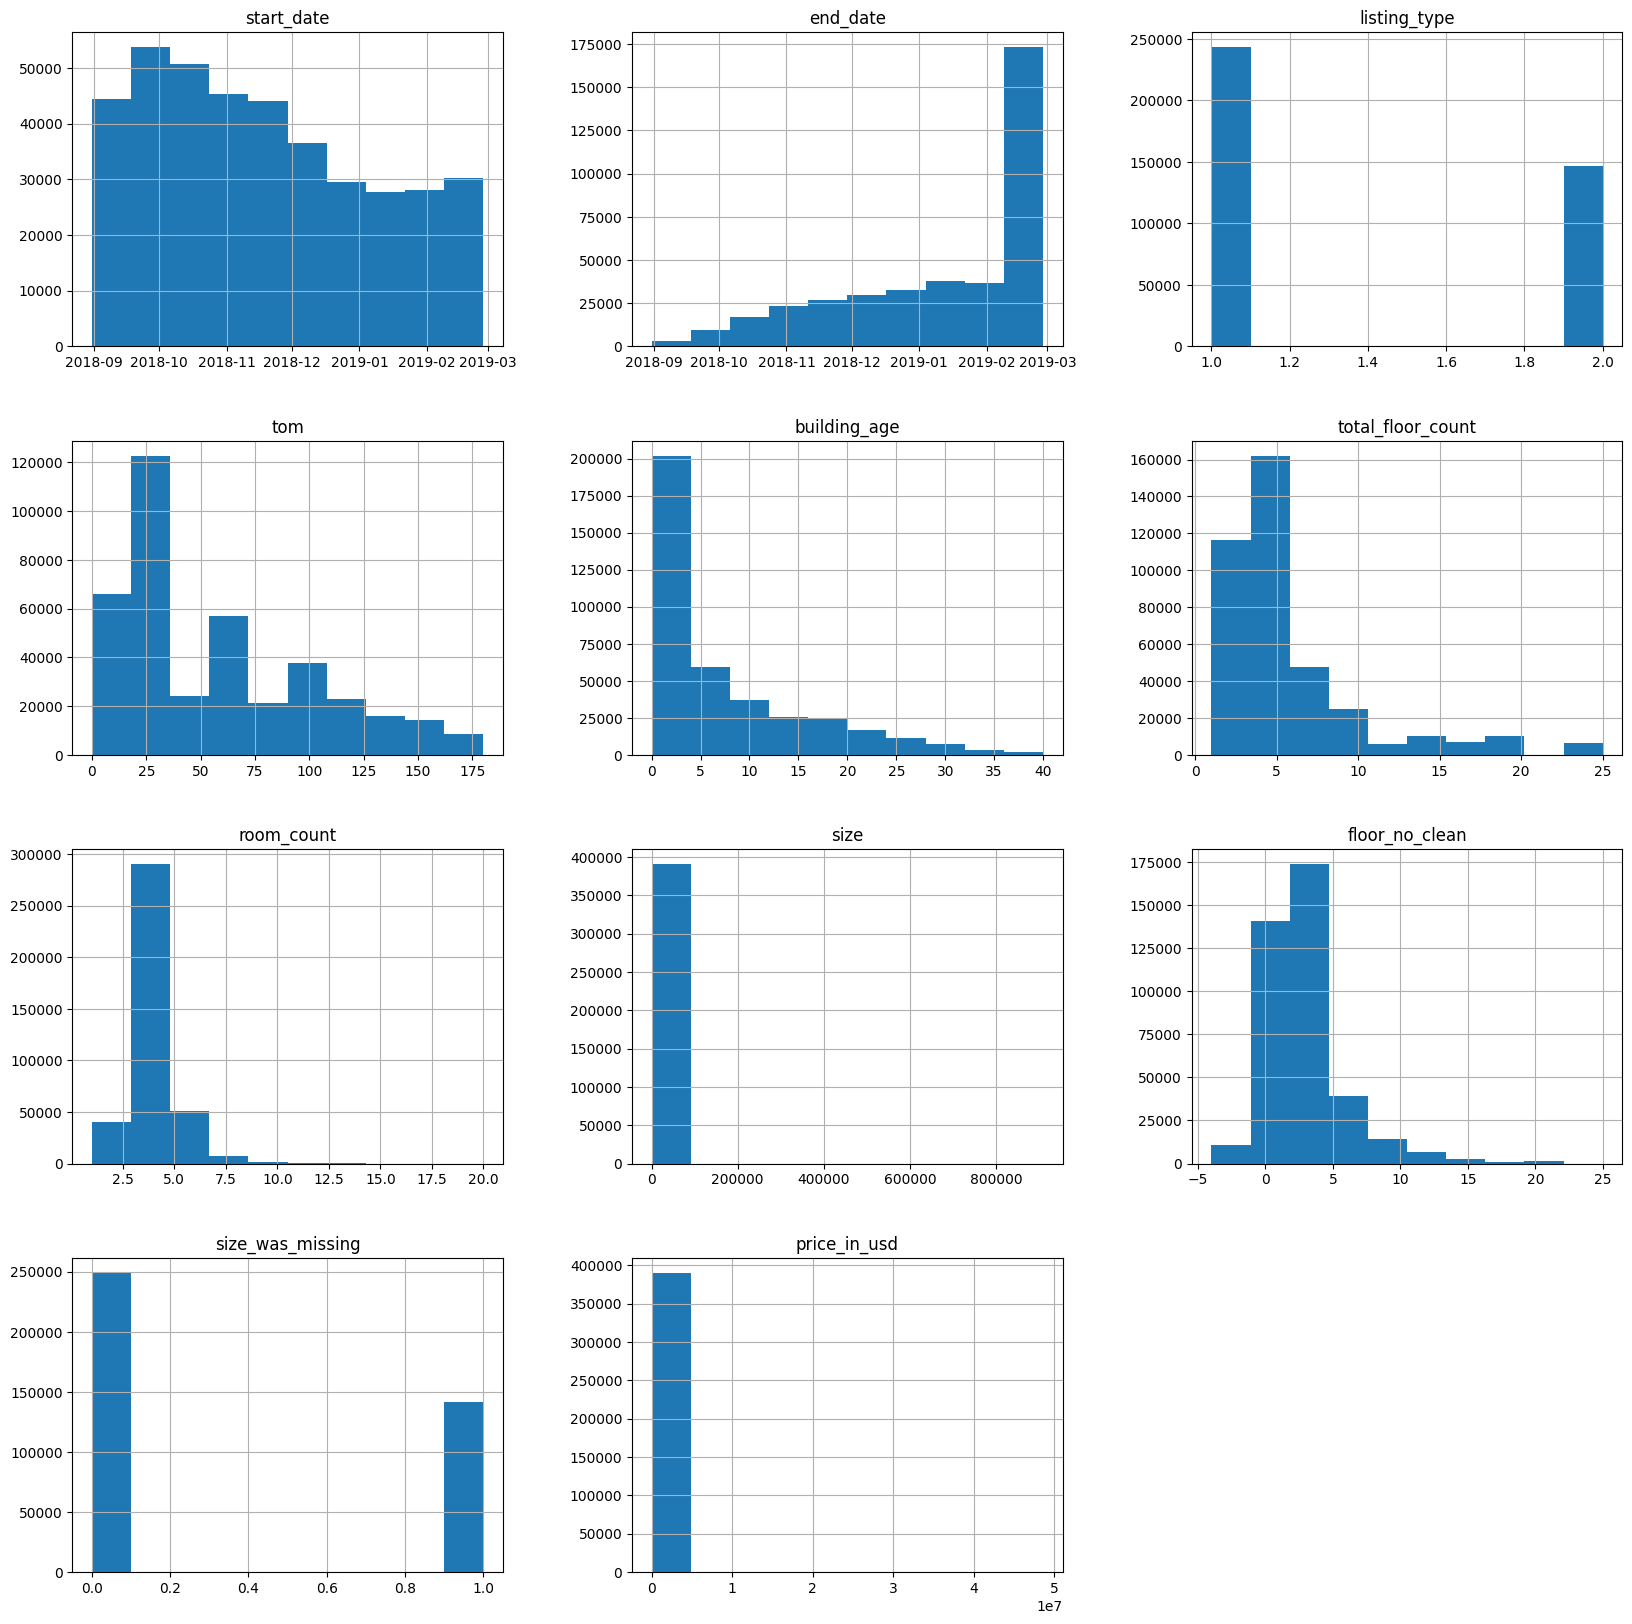

In [64]:
df.hist(figsize=(20,20), bins=10);

Можно сделать следующие выводы: start_date имеет скос вправо в распределении, а end_date - влево, tom и building_age скорее имеют скос вправо, как и total_floor_count, floor_no_clean и room_count. Признаки с ценой же имеют слишком большой разброс значений, что затрудняет сделать вывод о распределении, однако данные точно не распределены нормално.

Сыграем наперёд и прологарифмируем целевую переменную, чтобы снизить влияение элитного жилья.

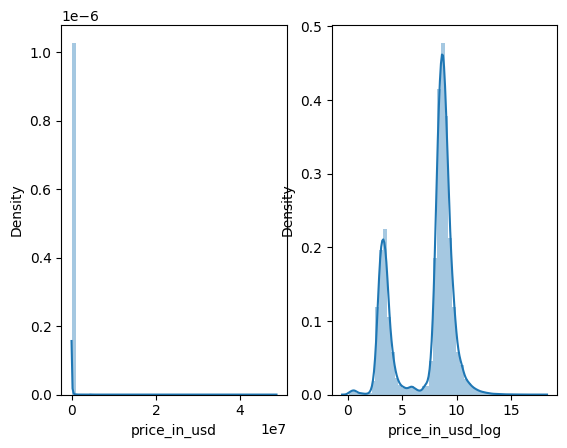

In [65]:
df['price_in_usd_log'] = np.log(df['price_in_usd'])

plt.figure(1)
plt.subplot(121)
sns.distplot(df['price_in_usd']);
plt.subplot(122)
sns.distplot(df['price_in_usd_log']);

Отлично, однако в ходе экспериментов с обучением моделей были приняты следующие решения: элитное очень дорогое жильё сильно бьёт по точности модели, оно хоть и представляет важный сектор недвижимости на рынке, но к сожалению от самых дорогих жилищ придётся избавиться. Также, для повышения точности модели будет добавлено несколько признаков.

In [94]:
df['size'].quantile(0.95)

np.float64(210.0)

In [66]:
q_price = df["price_in_usd"].quantile(0.99)
df.drop(df[df['price_in_usd'] > q_price].index, inplace=True)
q_price = df["price_in_usd"].quantile(0.99)

df['is_large'] = (df['size'] > df['size'].quantile(0.95)).astype(int)
df['is_penthouse'] = (df['floor_no_clean'] >= df['total_floor_count'] - 1).astype(int)
df['is_luxury'] = df['price_in_usd'].apply(lambda x: 1 if x > q_price else 0)

In [67]:
df['avg_price_by_district'] = df.groupby('district')['price_in_usd_log'].transform('mean')
df['median_size_by_city'] = df.groupby('city')['size'].transform('median')
df['room_density'] = df['room_count'] / df['size']  # комнат на кв.метр
df['floor_ratio'] = df['floor_no_clean'] / df['total_floor_count']  # относительный этаж

In [93]:
df['listing_type'] = df['listing_type'].replace(1, 'Продажа').replace(2, 'Аренда')

categorical_features = ['sub_type', 'listing_type', 'heating_type', 'city', 'district', 'neighborhood']

# Применение LabelEncoder к каждому категориальному признаку
label_encoders = {}  # Для сохранения энкодеров

for feature in categorical_features:
    # Инициализация LabelEncoder
    le = LabelEncoder()
    
    # Обучение и преобразование данных
    df[f'{feature}_encoded'] = le.fit_transform(df[feature].astype(str))
    
    # Сохранение энкодера для возможного обратного преобразования
    label_encoders[feature] = le

# Сохраняем
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

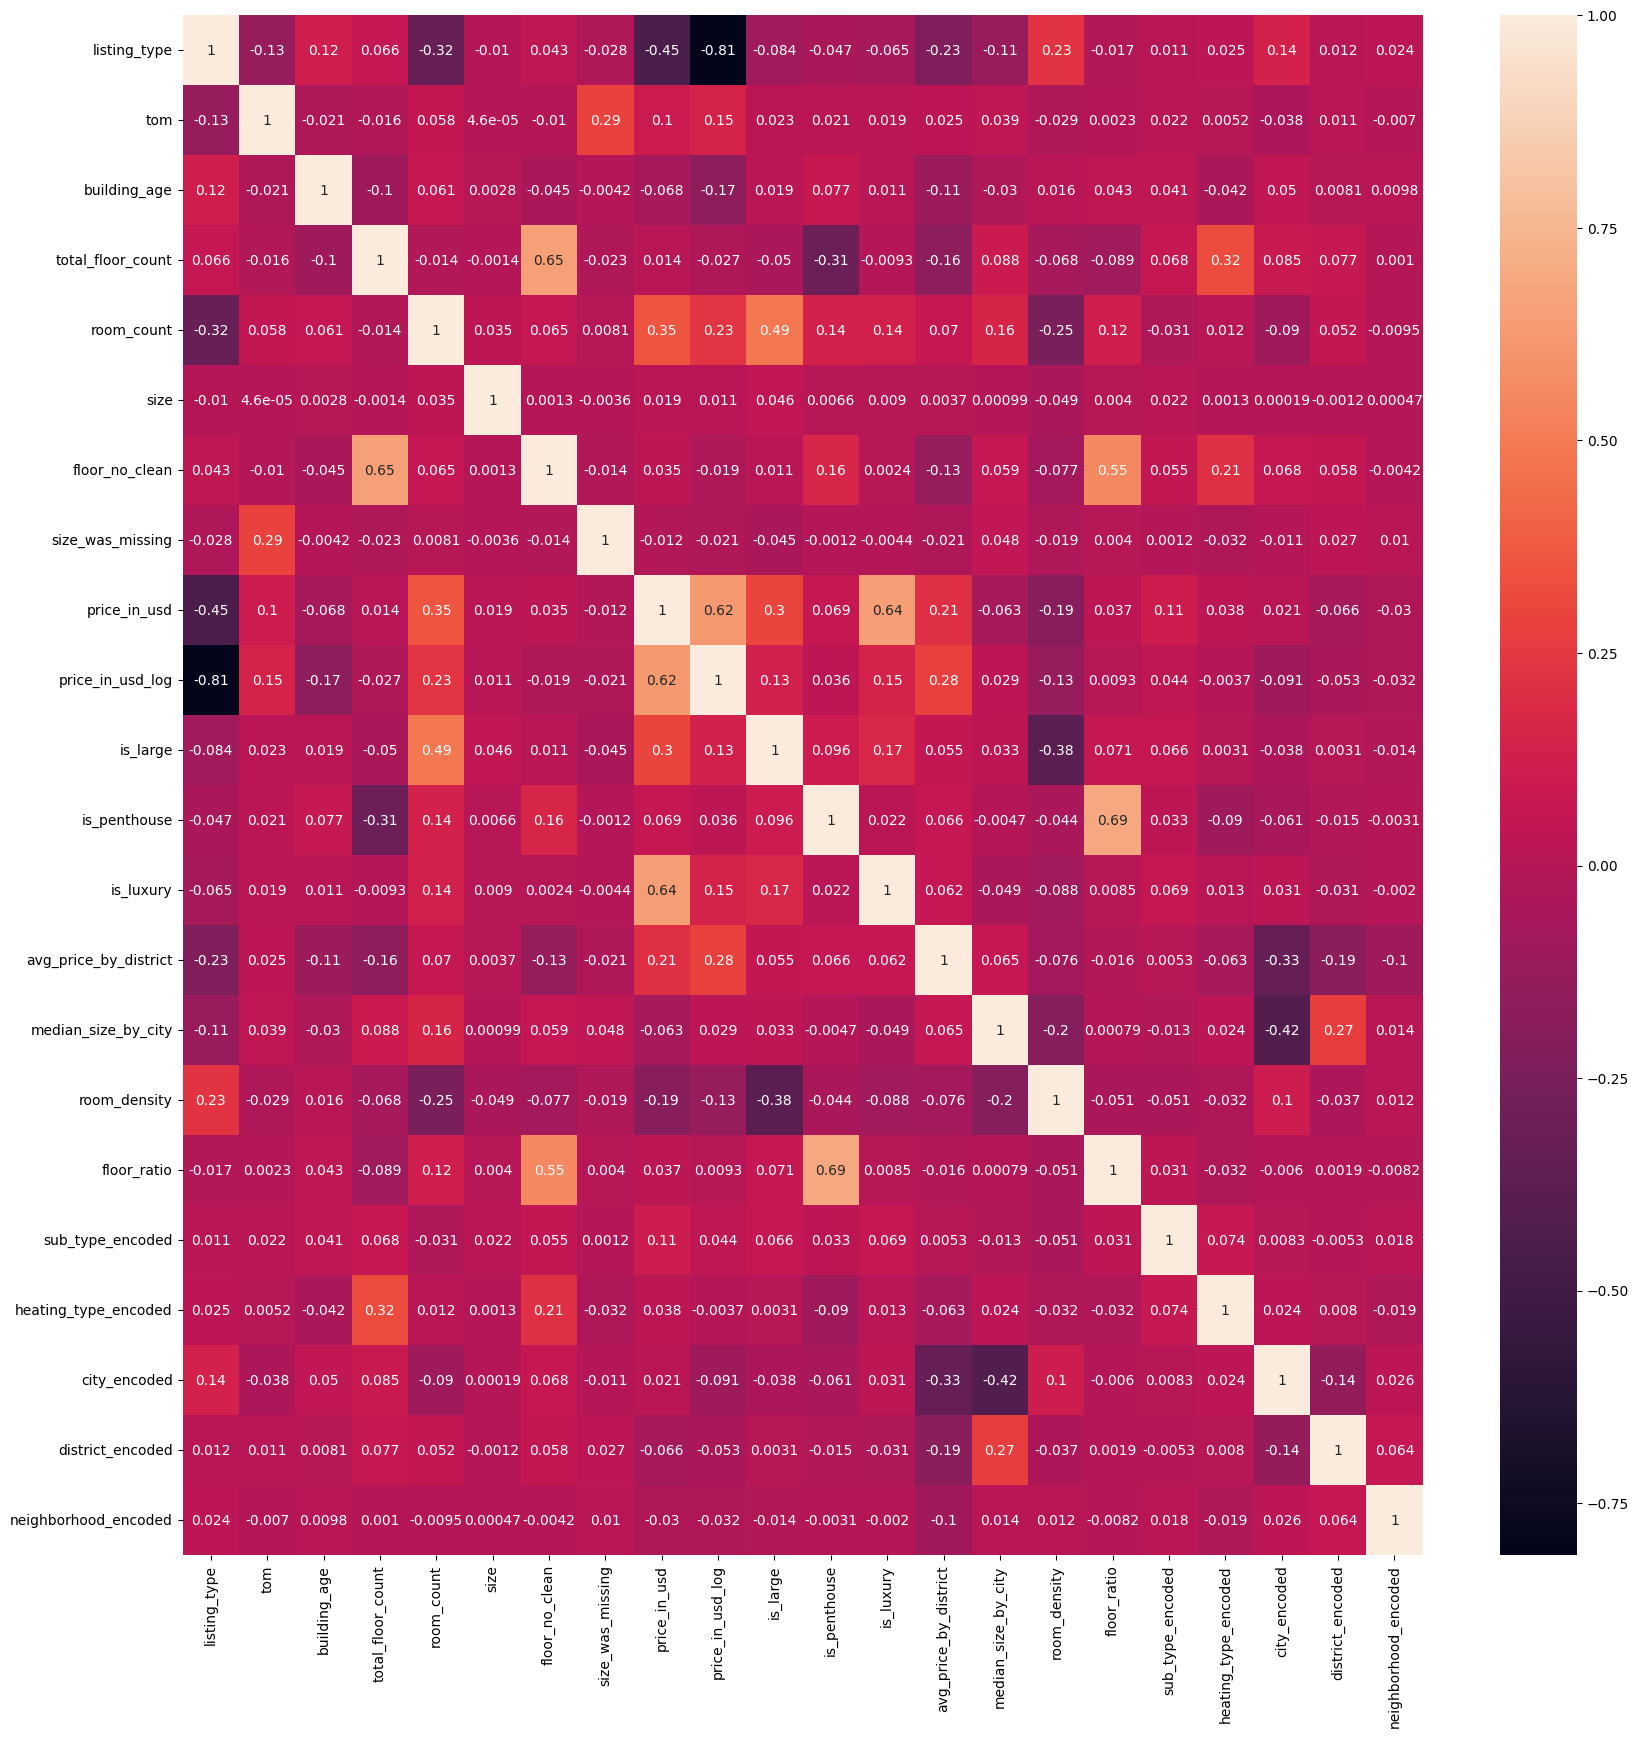

In [69]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.drop(['start_date', 'end_date'] + categorical_features, axis=1).corr(), annot=True);

О высокой корреляции: заметна сильная отрицательная корреляция между listing_type и лог. целевой пременной

## Подготовка к обучению

In [70]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import lightgbm as lgb

import time

In [71]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report
)
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [72]:
df.columns

Index(['sub_type', 'start_date', 'end_date', 'listing_type', 'tom',
       'building_age', 'total_floor_count', 'room_count', 'size',
       'heating_type', 'floor_no_clean', 'city', 'district', 'neighborhood',
       'size_was_missing', 'price_in_usd', 'price_in_usd_log', 'is_large',
       'is_penthouse', 'is_luxury', 'avg_price_by_district',
       'median_size_by_city', 'room_density', 'floor_ratio',
       'sub_type_encoded', 'heating_type_encoded', 'city_encoded',
       'district_encoded', 'neighborhood_encoded'],
      dtype='object')

In [73]:
features_regression = ['sub_type_encoded', 'listing_type', 'building_age', 
                       'total_floor_count', 'room_count', 'size', 
                       'heating_type_encoded', 'floor_no_clean',
                       'city_encoded', 'district_encoded', 'neighborhood_encoded',
                       'size_was_missing', 'price_in_usd_log', 
                       'is_large', 'is_penthouse']

features_classification = ['sub_type', 'sub_type_encoded', 'listing_type', 'building_age', 
                           'total_floor_count', 'room_count', 'size', 
                           'heating_type_encoded', 'floor_no_clean', 'price_in_usd', 
                           'is_large', 'is_penthouse']

df_ready_regression = df[features_regression]
display(df_ready_regression)

df_ready_classification = df[features_classification]
display(df_ready_regression)

,sub_type_encoded,listing_type,building_age,total_floor_count,room_count,size,heating_type_encoded,floor_no_clean,city_encoded,district_encoded,neighborhood_encoded,size_was_missing,price_in_usd_log,is_large,is_penthouse
id,,,,,,,,,,,,,,,
1,8,2,0.00,25.00,3.00,90.00,10,2.00,78,224,2379,0,4.44,0,0
2,1,2,0.00,25.00,1.00,43.00,10,20.00,78,224,2379,0,9.38,0,0
3,1,1,0.00,1.00,3.00,95.00,10,1.00,66,433,3170,1,8.23,0,1
5,8,1,0.00,25.00,3.00,90.00,10,2.00,78,224,2379,0,10.47,0,0
6,8,2,2.00,16.00,2.00,45.00,10,10.00,78,272,318,0,9.85,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403481,1,1,2.00,3.00,4.00,135.00,2,1.00,9,119,1206,1,8.41,0,0
403483,1,2,0.00,4.00,3.00,80.00,2,2.00,78,355,95,1,3.60,0,0
403484,1,1,7.00,3.00,3.00,98.00,2,2.00,61,4,967,1,7.98,0,1


,sub_type_encoded,listing_type,building_age,total_floor_count,room_count,size,heating_type_encoded,floor_no_clean,city_encoded,district_encoded,neighborhood_encoded,size_was_missing,price_in_usd_log,is_large,is_penthouse
id,,,,,,,,,,,,,,,
1,8,2,0.00,25.00,3.00,90.00,10,2.00,78,224,2379,0,4.44,0,0
2,1,2,0.00,25.00,1.00,43.00,10,20.00,78,224,2379,0,9.38,0,0
3,1,1,0.00,1.00,3.00,95.00,10,1.00,66,433,3170,1,8.23,0,1
5,8,1,0.00,25.00,3.00,90.00,10,2.00,78,224,2379,0,10.47,0,0
6,8,2,2.00,16.00,2.00,45.00,10,10.00,78,272,318,0,9.85,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403481,1,1,2.00,3.00,4.00,135.00,2,1.00,9,119,1206,1,8.41,0,0
403483,1,2,0.00,4.00,3.00,80.00,2,2.00,78,355,95,1,3.60,0,0
403484,1,1,7.00,3.00,3.00,98.00,2,2.00,61,4,967,1,7.98,0,1


In [74]:
# Определение признаков и целевой переменной
X = df_ready_regression.drop(['price_in_usd_log'], axis=1)
y = df_ready_regression['price_in_usd_log']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [75]:
from sklearn.preprocessing import RobustScaler

# Инициализация scaler
scaler = RobustScaler()

# Список числовых признаков
num_features = ['building_age', 'total_floor_count', 'room_count', 
                'size', 'floor_no_clean']

# Обучаем scaler на тренировочных данных и применяем к обеим выборкам
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

with open('ScalerRegression.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [76]:
X_train.head(5)

,sub_type_encoded,listing_type,building_age,total_floor_count,room_count,size,heating_type_encoded,floor_no_clean,city_encoded,district_encoded,neighborhood_encoded,size_was_missing,is_large,is_penthouse
id,,,,,,,,,,,,,,
252783,1,2,-0.27,1.00,-1.00,-0.75,2,1.33,78,321,2220,0,0,1
373925,1,1,-0.27,0.00,-1.00,-0.39,7,-0.33,11,127,232,0,0,0
266969,1,1,-0.27,-0.33,0.00,1.47,2,0.00,39,286,3117,0,0,1
29937,1,1,0.64,1.33,0.00,0.39,1,-0.33,6,295,1718,0,0,0
328152,8,2,0.64,7.00,-2.00,-0.59,11,2.33,78,81,2674,1,0,0


In [77]:
y_train

id
252783    8.75
373925    8.44
266969    9.10
29937    10.26
328152   11.01
          ... 
269232    8.57
381030    5.72
138309    8.99
153713    8.54
127898    8.99
Name: price_in_usd_log, Length: 309181, dtype: float64

## Обучение моделей регрессии

In [78]:
# Обучение и оценка моделей
models = {
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(
                                    random_seed=42,
                                    loss_function='MAE',
                                    cat_features=['listing_type'],
                                    verbose=False  # Добавляем для уменьшения вывода
                                )
}

results = {}
training_times = {}

for name, model in models.items():
    print(f"Обучение модели: {name}")
    
    # Замер времени обучения
    start_time = time.time()
    
    # Обучение модели
    model.fit(X_train, y_train)
    
    # Замер времени предсказания
    pred_start_time = time.time()
    y_pred_log = model.predict(X_test)
    pred_time = time.time() - pred_start_time

    # Действие обратное логарифмированию
    y_pred = np.exp(y_pred_log)
    y_true = np.exp(y_test)
    
    # Расчет метрик
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    # Сохранение результатов
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'model': model
    }
    
    training_time = time.time() - start_time
    training_times[name] = {
        'training_time': training_time,
        'prediction_time': pred_time
    }
    
    print(f"  {name}:")
    print(f"    MAE: {mae:.2f}")
    print(f"    RMSE: {rmse:.2f}")
    print(f"    R2: {r2:.4f}")
    print(f"    Время обучения: {training_time:.2f} сек")
    print(f"    Время предсказания: {pred_time:.4f} сек")
    print()

Обучение модели: Gradient Boosting
  Gradient Boosting:
    MAE: 2661.92
    RMSE: 6271.57
    R2: 0.5135
    Время обучения: 26.52 сек
    Время предсказания: 0.1069 сек

Обучение модели: XGBoost
  XGBoost:
    MAE: 2165.43
    RMSE: 5252.08
    R2: 0.6588
    Время обучения: 0.35 сек
    Время предсказания: 0.0202 сек

Обучение модели: RandomForest
  RandomForest:
    MAE: 1575.12
    RMSE: 4455.25
    R2: 0.7545
    Время обучения: 124.84 сек
    Время предсказания: 2.7530 сек

Обучение модели: CatBoost
  CatBoost:
    MAE: 2208.34
    RMSE: 5523.81
    R2: 0.6226
    Время обучения: 26.61 сек
    Время предсказания: 0.0331 сек



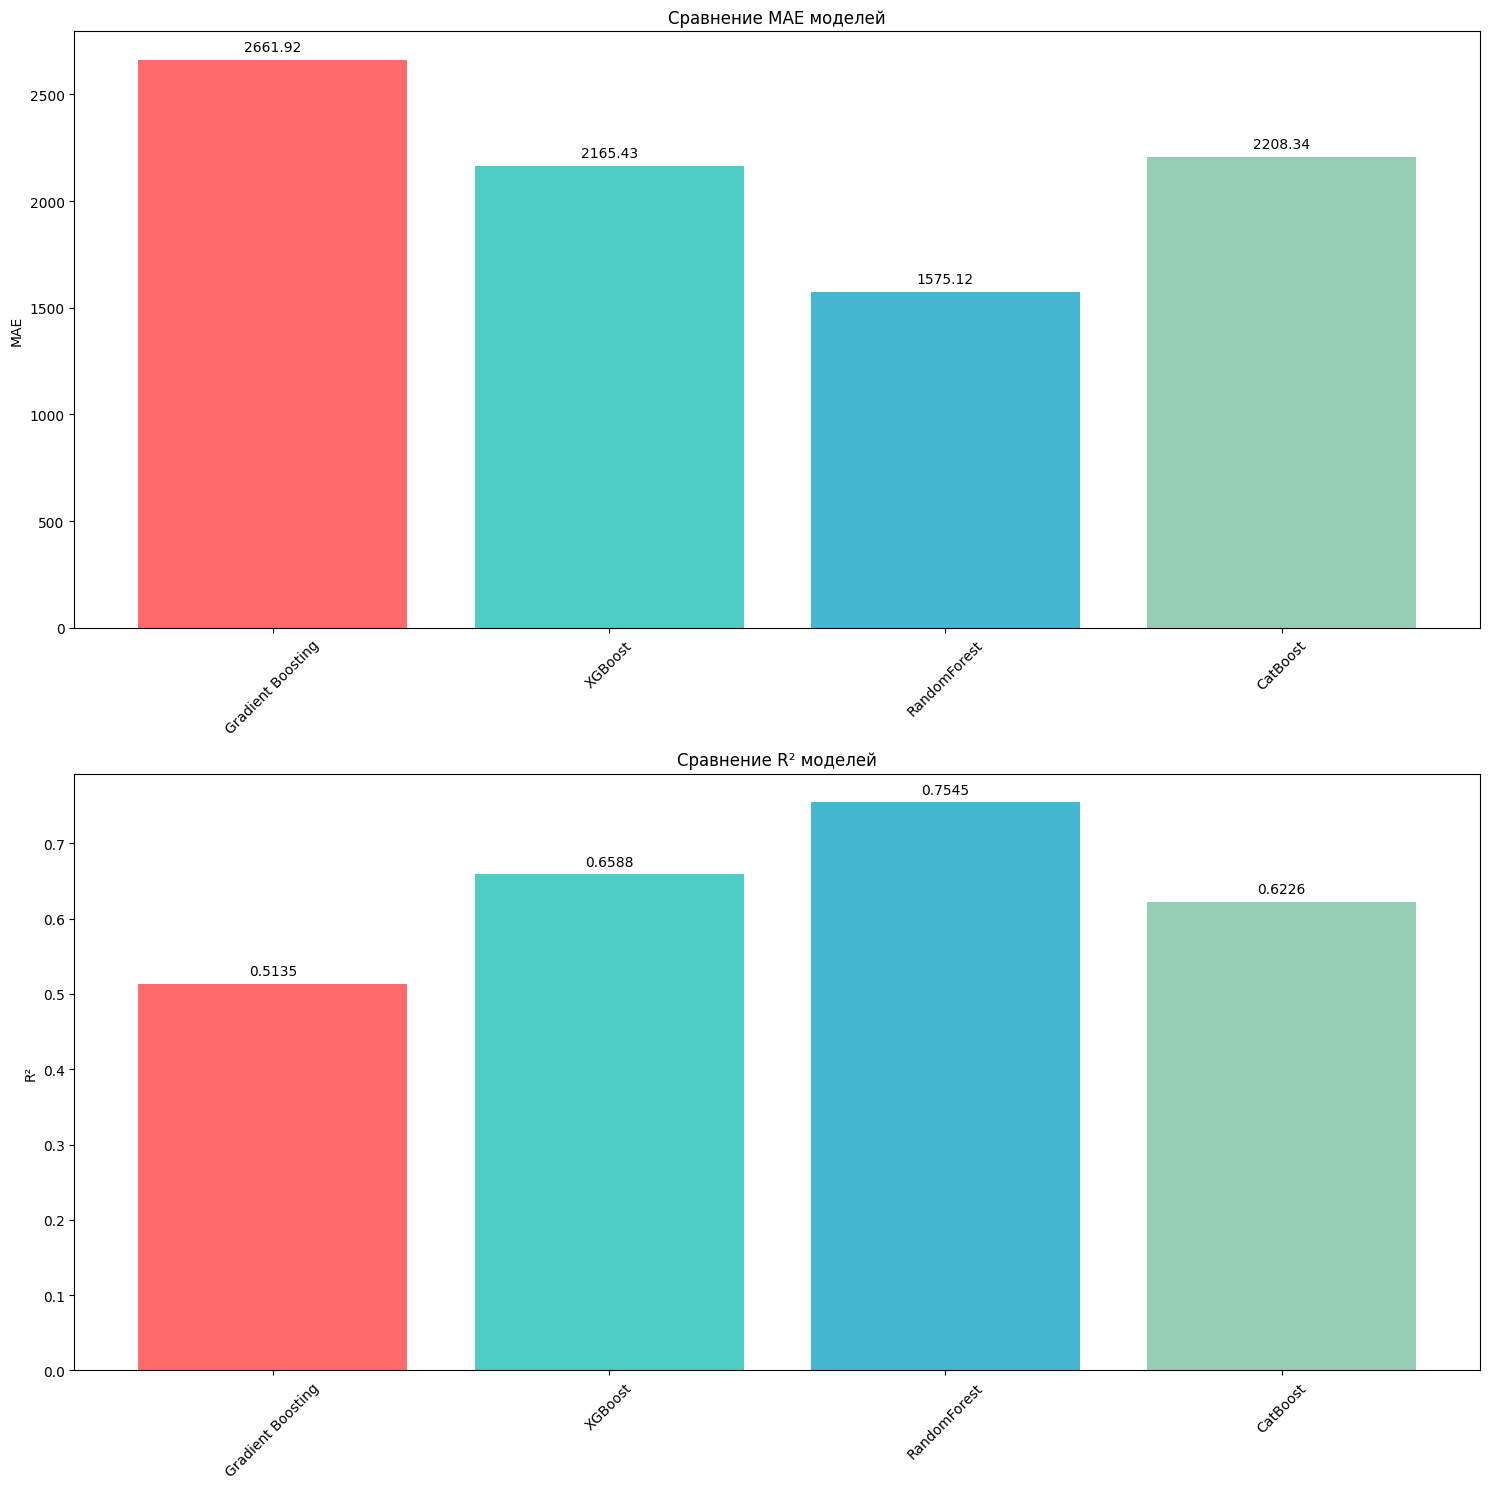

In [79]:
# Визуализация сравнения моделей
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))

# График MAE
models_names = list(results.keys())
mae_values = [results[name]['MAE'] for name in models_names]
bars = ax1.bar(models_names, mae_values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
ax1.set_title('Сравнение MAE моделей')
ax1.set_ylabel('MAE')
ax1.tick_params(axis='x', rotation=45)
# Добавляем значения на столбцы
for bar, value in zip(bars, mae_values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(mae_values)*0.01,
             f'{value:.2f}', ha='center', va='bottom')

# График R²
r2_values = [results[name]['R2'] for name in models_names]
bars = ax2.bar(models_names, r2_values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
ax2.set_title('Сравнение R² моделей')
ax2.set_ylabel('R²')
ax2.tick_params(axis='x', rotation=45)
for bar, value in zip(bars, r2_values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(r2_values)*0.01,
             f'{value:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [80]:
with open('RFR.pkl', 'wb') as f:
    pickle.dump(models['RandomForest'], f)

В итоге задачи регрессии было обучено 4 модели: GradientBoosting, XGBoost, RandomForest и CatBoost - лучшей оказалась RandomForest с R2 score = 0.75.  

Данные для обучения были заранее стандартизированны, а для уменьшения влияния дорого жилья на результаты оубчения модели, целевая переменная была логарифмированна

## Обучение моделей классификации

In [81]:
for sub_type in df_ready_classification['sub_type'].unique():
    sub_type_count = df_ready_classification[df_ready_classification['sub_type'] == sub_type].shape[0]
    
    print(f'{sub_type}')
    print(f'Количестов записей - {sub_type_count}')
    print('_'*50)

Резиденция
Количестов записей - 7032
__________________________________________________
Квартира
Количестов записей - 342212
__________________________________________________
Вилла
Количестов записей - 19015
__________________________________________________
Отдельный дом
Количестов записей - 8889
__________________________________________________
Летний дом
Количестов записей - 5732
__________________________________________________
Целое здание
Количестов записей - 2234
__________________________________________________
Сборный дом
Количестов записей - 572
__________________________________________________
Особняк / Прибрежный дом (Ялы)
Количестов записей - 146
__________________________________________________
Фермерский дом
Количестов записей - 408
__________________________________________________
Прибрежная квартира
Количестов записей - 140
__________________________________________________
Лофт
Количестов записей - 32
__________________________________________________
Кооперати

Квартира:  
Квартира — 342 212 → основной тип  
Прибрежная квартира — 140 → это тоже квартира, просто с локацией  
Лофт — 32 → специфический тип квартиры/пространства  
Кооператив — 65 → форма владения, но по сути тоже квартира    

Частный дом:
Отдельный дом — 8 889  
Вилла — 19 015 → часто роскошный отдельный дом  
Особняк / Прибрежный дом (Ялы) — 146 → тоже частный дом, часто большой  
Фермерский дом — 408 → сельский дом, но всё равно дом  
Летний дом — 5 732 → сезонный, но всё равно дом  
Сборный дом — 572 → временные/модульные дома    

Комплекс / Здание:
Целое здание — 2 234 → коммерческий или жилой, но масштабный  
Резиденция — 7 032 → может быть жилым комплексом, элитным объектом  

Прочее:
Сборный дом → 572 (если не включать в "Частный дом")

In [82]:
def group_sub_type(sub_type):
    mapping = {
        'Квартира': 'Квартира',
        'Прибрежная квартира': 'Квартира',
        'Лофт': 'Квартира',
        'Кооператив': 'Квартира',

        'Отдельный дом': 'Частный дом',
        'Вилла': 'Частный дом',
        'Летний дом': 'Частный дом',
        'Фермерский дом': 'Частный дом',
        'Особняк / Прибрежный дом (Ялы)': 'Частный дом',

        'Целое здание': 'Комплекс / Здание',
        'Резиденция': 'Комплекс / Здание',

        'Сборный дом': 'Прочее'  # или 'Частный дом', если логичнее
    }
    return mapping.get(sub_type, 'Прочее')  # на случай новых значений

# Применение
df_ready_classification['sub_type'] = df_ready_classification['sub_type'].apply(group_sub_type)

# Проверка распределения
print(df_ready_classification['sub_type'].value_counts())

sub_type
Квартира             342449
Частный дом           34190
Комплекс / Здание      9266
Прочее                  572
Name: count, dtype: int64


In [83]:
df_ready_classification

,sub_type,sub_type_encoded,listing_type,building_age,total_floor_count,room_count,size,heating_type_encoded,floor_no_clean,price_in_usd,is_large,is_penthouse
id,,,,,,,,,,,,
1,Комплекс / Здание,8,2,0.00,25.00,3.00,90.00,10,2.00,85.02,0,0
2,Квартира,1,2,0.00,25.00,1.00,43.00,10,20.00,11903.08,0,0
3,Квартира,1,1,0.00,1.00,3.00,95.00,10,1.00,3765.26,0,1
5,Комплекс / Здание,8,1,0.00,25.00,3.00,90.00,10,2.00,35223.40,0,0
6,Комплекс / Здание,8,2,2.00,16.00,2.00,45.00,10,10.00,18947.76,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
403481,Квартира,1,1,2.00,3.00,4.00,135.00,2,1.00,4494.02,0,0
403483,Квартира,1,2,0.00,4.00,3.00,80.00,2,2.00,36.44,0,0
403484,Квартира,1,1,7.00,3.00,3.00,98.00,2,2.00,2915.04,0,1


In [84]:
df_ready_classification['sub_type'] = df_ready_classification['sub_type'].replace('Квартира', 0).replace('Частный дом', 1).replace('Комплекс / Здание', 2).replace('Прочее', 3)
df_ready_classification.drop('sub_type_encoded', axis=1, inplace=True)
df_ready_classification

,sub_type,listing_type,building_age,total_floor_count,room_count,size,heating_type_encoded,floor_no_clean,price_in_usd,is_large,is_penthouse
id,,,,,,,,,,,
1,2,2,0.00,25.00,3.00,90.00,10,2.00,85.02,0,0
2,0,2,0.00,25.00,1.00,43.00,10,20.00,11903.08,0,0
3,0,1,0.00,1.00,3.00,95.00,10,1.00,3765.26,0,1
5,2,1,0.00,25.00,3.00,90.00,10,2.00,35223.40,0,0
6,2,2,2.00,16.00,2.00,45.00,10,10.00,18947.76,0,0
...,...,...,...,...,...,...,...,...,...,...,...
403481,0,1,2.00,3.00,4.00,135.00,2,1.00,4494.02,0,0
403483,0,2,0.00,4.00,3.00,80.00,2,2.00,36.44,0,0
403484,0,1,7.00,3.00,3.00,98.00,2,2.00,2915.04,0,1


In [85]:
# Определение признаков и целевой переменной
X = df_ready_classification.drop(['sub_type'], axis=1)
y = df_ready_classification['sub_type']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [86]:
from sklearn.preprocessing import RobustScaler

# Инициализация scaler
scaler = RobustScaler()

# Список числовых признаков
num_features = ['building_age', 'total_floor_count', 'room_count', 
                'size', 'floor_no_clean']

# Обучаем scaler на тренировочных данных и применяем к обеим выборкам
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

with open('ScalerClassifier.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [87]:
# Словарь моделей (классификаторы)
results = {}
training_times = {}

models = {
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False),
    'RandomForest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
}

# Обучение и оценка моделей классификации
for name, model in models.items():
    print(f"Обучение модели: {name}")
    
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    pred_start_time = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - pred_start_time
    
    # Используйте метрики классификации
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Сохранение результатов
    results[name] = {
        'Accuracy': accuracy,
        'F1 score': f1,
        'model': model
    }
    
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print(classification_report(y_test, y_pred))
    print(f"  Время обучения: {training_time:.2f} сек")
    print(f"  Время предсказания: {pred_time:.4f} сек")
    print()

Обучение модели: XGBoost
  Accuracy: 0.9491
  F1-score: 0.9441
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     68448
           1       0.86      0.77      0.81      6911
           2       0.72      0.27      0.39      1829
           3       0.88      0.81      0.85       108

    accuracy                           0.95     77296
   macro avg       0.85      0.71      0.76     77296
weighted avg       0.94      0.95      0.94     77296

  Время обучения: 1.42 сек
  Время предсказания: 0.0752 сек

Обучение модели: RandomForest
  Accuracy: 0.9595
  F1-score: 0.9570
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     68448
           1       0.88      0.82      0.85      6911
           2       0.82      0.45      0.58      1829
           3       0.91      0.80      0.85       108

    accuracy                           0.96     77296
   macro avg       0.89      0.77      0.81    

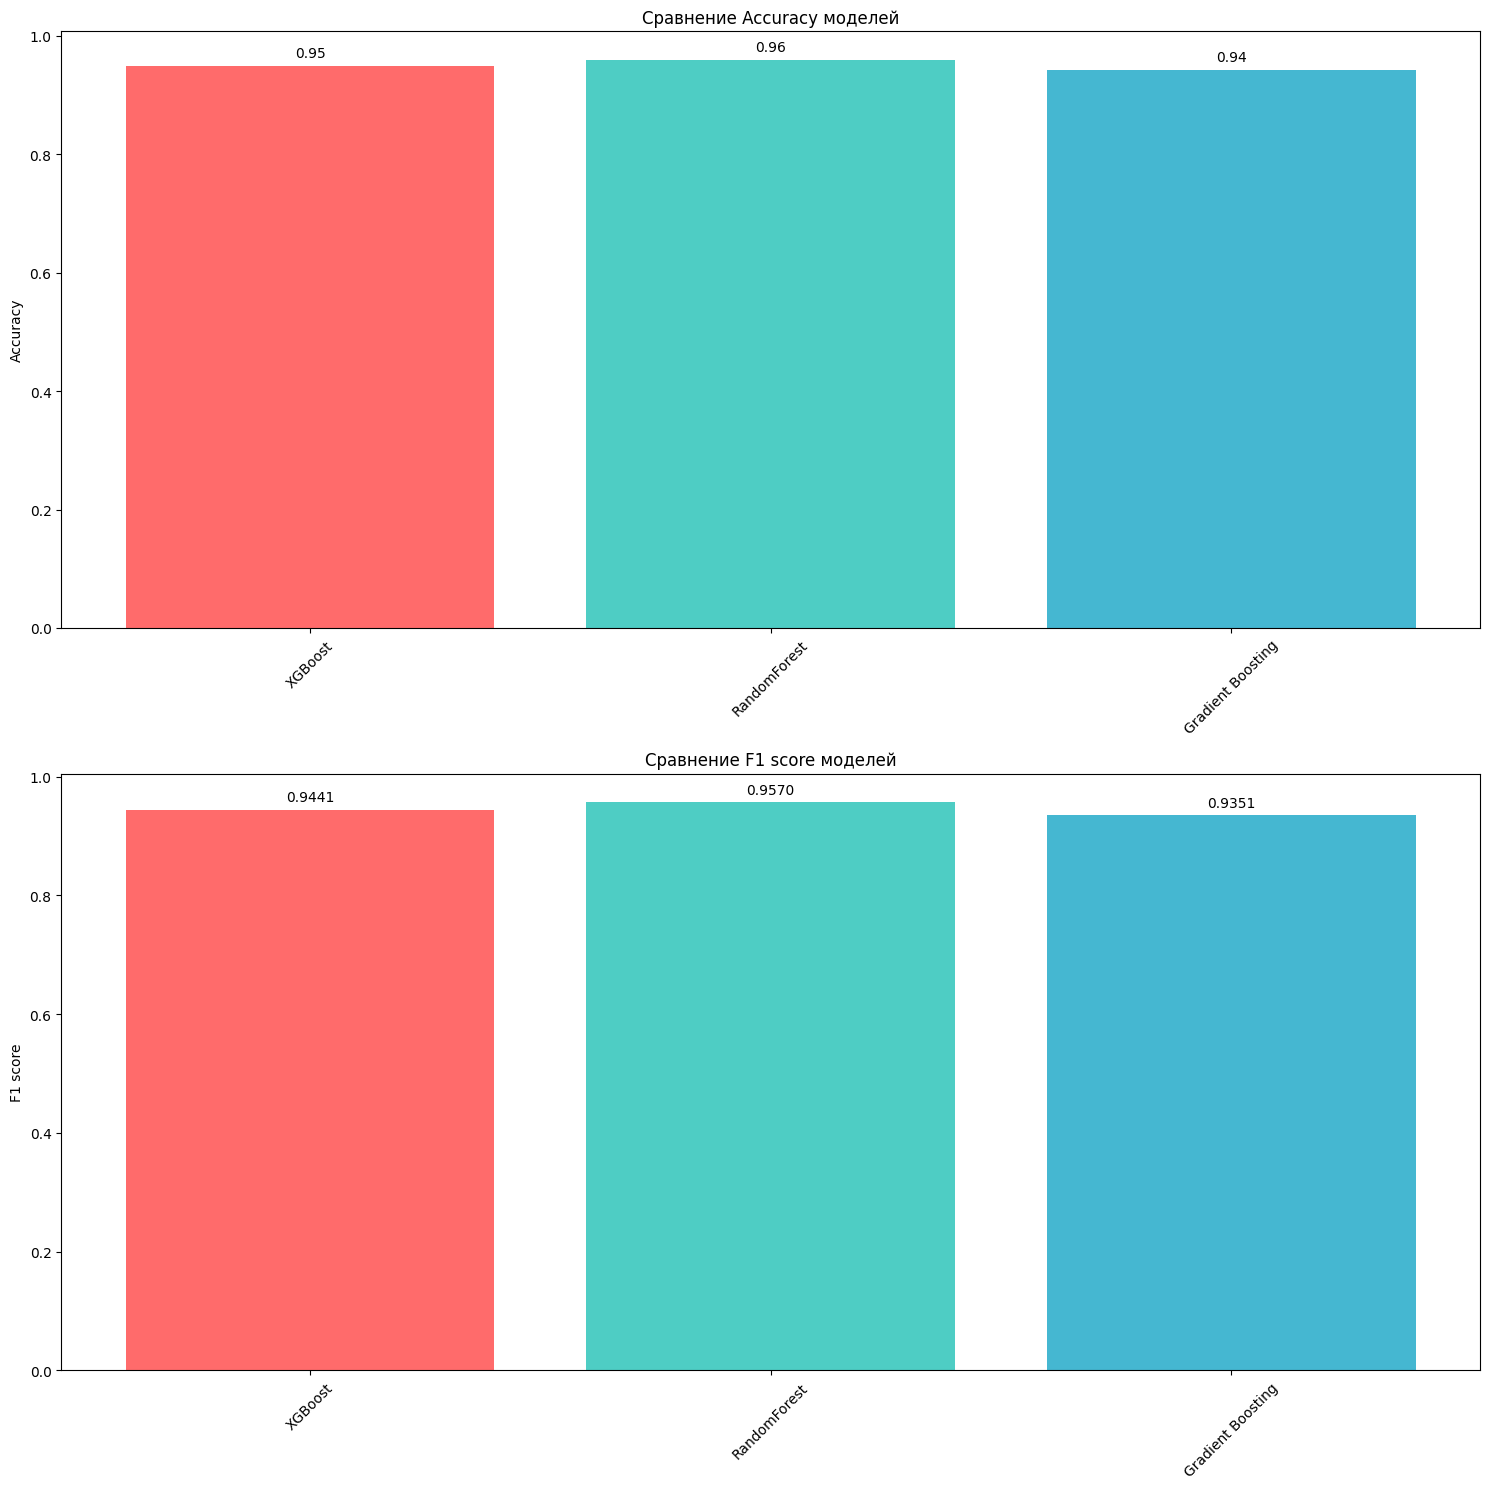

In [88]:
# Визуализация сравнения моделей
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))

# График MAE
models_names = list(results.keys())
mae_values = [results[name]['Accuracy'] for name in models_names]
bars = ax1.bar(models_names, mae_values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
ax1.set_title('Сравнение Accuracy моделей')
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='x', rotation=45)
# Добавляем значения на столбцы
for bar, value in zip(bars, mae_values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(mae_values)*0.01,
             f'{value:.2f}', ha='center', va='bottom')

# График R²
r2_values = [results[name]['F1 score'] for name in models_names]
bars = ax2.bar(models_names, r2_values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
ax2.set_title('Сравнение F1 score моделей')
ax2.set_ylabel('F1 score')
ax2.tick_params(axis='x', rotation=45)
for bar, value in zip(bars, r2_values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(r2_values)*0.01,
             f'{value:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [89]:
with open('RFC.pkl', 'wb') as f:
    pickle.dump(models['RandomForest'], f)

В итоге задачи классификации были обработаны данные специально для этой задачи, а именно целевая переменная была урезана путём объединения похожив типов недвижимости.   

Было обучено 3 модели: XGBoost, RandomForest, GradientBoosting - лучшей оказалась RandomForest с F1 score = 0.95. Модель лучше всех предсказывает классы по отдельности.

## Итог

Была проведена работа по очистке и преобразованию сырого набора данных, содержащего более 400 тысяч записей об объектах недвижимости в Турции. Проделанная работа превратила сложный, зашумленный датасет с пропусками и неоднородными данными в чистый, структурированный и готовый к анализу и построению моделей машинного обучения ресурс.

1. Обработка данных:

- Были удалены столбцы, не несущие информационной ценности (type, furnished).

- Удалено более 11 тысяч повторяющихся записей, что повысило качество данных.

- Турецкие категориальные значения (sub_type, heating_type) были переведены на русский язык, что исключает необходимость постоянного обращения к словарю.

-  Пропуски были заполнены с помощью групповых медиан, что сохранило статистическую целостность данных, путем группировки по городу, округу и количеству комнат.

2. Преобразование признаков:

- Временные данные были преобразованы в корректный datetime-формат.

- Строковые описания этажей были с помощью логических правил и словарей преобразованы в числовые значения.

- Категориальные диапазоны преобразованы в конкретные числовые значения.

3. Очистка от аномалий и шума:

- Были выявлены и удалены статистические аномалии.

- Проведена работа по приведению типов данных всех признаков к ожидаемым (числовые, категориальные, даты).

В результате был получен надежный фундамент для дальнейшего построения точных и эффективных моделей машинного обучения.

4. Обучение моделей

- Для каждой задачи было обучено по несколько моделей.
  
- Лучшие модели были выявлены по результатам сравнения.  
 
- Модели были сохранены.  